In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 15
import seaborn as sns
from plotnine import *
import missingno as msno
import folium

전국 도시 공원 표준 데이터  
공공데이터포털(https://www.data.go.kr/)에서 전국도시공원정보표준데이터 검색  
<img src="./datagokr3.png" width="1000" align="left">

데이터 로드하고 관찰한다.

In [2]:
park_202212 = pd.read_csv('./data/park_202212.csv', encoding='euc-kr')
park_202212

관리번호              공원명   공원구분 소재지도로명주소                  소재지지번주소  \
0      47190-00127           백현체육공원   체육공원      NaN      경상북도 구미시 산동면 백현리 79   
1      47190-00128            둘모아공원  어린이공원      NaN       경상북도 구미시 봉곡동 584-2   
2      47190-00129            다붓소공원    소공원      NaN      경상북도 구미시 봉곡동 765 일원   
3      47190-00130            다붓1공원  어린이공원      NaN       경상북도 구미시 봉곡동 457-1   
4      47190-00131            다붓2공원  어린이공원      NaN         경상북도 구미시 봉곡동 767   
...            ...              ...    ...      ...                      ...   
17460  41461-00025      삼가지구 어린이공원1  어린이공원      NaN    경기도 용인시 처인구 삼가동 288-1   
17461  41461-00026       삼가1지구 체육공원   체육공원      NaN   경기도 용인시 처인구 삼가동 268-26   
17462  41461-00027      제107호 어린이공원  어린이공원      NaN  경기도 용인시 처인구 모현읍 왕산리 949   
17463  41461-00028      제105호 어린이공원  어린이공원      NaN   경기도 용인시 처인구 포곡읍 둔전리450   
17464  41465-00016  제15호 근린공원(수지공원)   근린공원      NaN     경기도 용인시 수지구 풍덕천동 696   

              위도          경도     공원면적 공원보유시설(운동시설) 공원보유시설(유희시설) 공원보유시설(편익시설)  \
0      36.186429  128.478491  90967.0          NaN          NaN          NaN   
1      36.148431  128.316594   4279.0          NaN          NaN          NaN   
2      36.155883  128.311526    805.0          NaN          NaN          NaN   
3      36.156392  128.314372   1585.0          NaN          NaN          NaN   
4      36.154808  128.314372   1637.0          NaN          NaN          NaN   
...          ...         ...      ...          ...          ...          ...   
17460  37.238001  127.164249   4878.0          NaN          NaN          NaN   
17461  37.238235  127.169302  17748.0          NaN          NaN          NaN   
17462  37.333938  127.253862   5817.0          NaN          NaN          NaN   
17463  37.272922  127.221799   2558.0          NaN          NaN          NaN   
17464  37.323979  127.091005  15741.0          NaN          NaN          NaN   

      공원보유시설(교양시설) 공원보유시설(기타시설)       지정고시일 관리기관명 전화번호     데이터기준일자   제공기관코드  \
0              NaN          NaN         NaN   NaN  NaN  2022-06-09  5080000   
1              NaN          NaN         NaN   NaN  NaN  2022-06-09  5080000   
2              NaN          NaN         NaN   NaN  NaN  2022-06-09  5080000   
3              NaN          NaN         NaN   NaN  NaN  2022-06-09  5080000   
4              NaN          NaN         NaN   NaN  NaN  2022-06-09  5080000   
...            ...          ...         ...   ...  ...         ...      ...   
17460          NaN          NaN  2008-10-02   NaN  NaN  2022-11-23  4050000   
17461          NaN          NaN  2008-10-02   NaN  NaN  2022-11-23  4050000   
17462          NaN          NaN  2008-10-06   NaN  NaN  2022-11-23  4050000   
17463          NaN          NaN  2008-10-06   NaN  NaN  2022-11-23  4050000   
17464          NaN          NaN  1995-12-30   NaN  NaN  2022-11-23  4050000   

          제공기관명  
0      경상북도 구미시  
1      경상북도 구미시  
2      경상북도 구미시  
3      경상북도 구미시  
4      경상북도 구미시  
...         ...  
17460   경기도 용인시  
17461   경기도 용인시  
17462   경기도 용인시  
17463   경기도 용인시  
17464   경기도 용인시  

[17465 rows x 19 columns]

In [3]:
# park_202212.dtypes
park_202212.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17465 entries, 0 to 17464
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          17465 non-null  object 
 1   공원명           17465 non-null  object 
 2   공원구분          17465 non-null  object 
 3   소재지도로명주소      4114 non-null   object 
 4   소재지지번주소       17126 non-null  object 
 5   위도            17425 non-null  float64
 6   경도            17426 non-null  float64
 7   공원면적          17465 non-null  float64
 8   공원보유시설(운동시설)  4849 non-null   object 
 9   공원보유시설(유희시설)  6170 non-null   object 
 10  공원보유시설(편익시설)  4848 non-null   object 
 11  공원보유시설(교양시설)  807 non-null    object 
 12  공원보유시설(기타시설)  2585 non-null   object 
 13  지정고시일         14552 non-null  object 
 14  관리기관명         15956 non-null  object 
 15  전화번호          16194 non-null  object 
 16  데이터기준일자       17465 non-null  object 
 17  제공기관코드        17465 non-null  object 
 18  제공기관명         17465 non-nu

In [4]:
# park_202212.isnull().sum()
park_202212.isna().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        13351
소재지지번주소           339
위도                 40
경도                 39
공원면적                0
공원보유시설(운동시설)    12616
공원보유시설(유희시설)    11295
공원보유시설(편익시설)    12617
공원보유시설(교양시설)    16658
공원보유시설(기타시설)    14880
지정고시일            2913
관리기관명            1509
전화번호             1271
데이터기준일자             0
제공기관코드              0
제공기관명               0
dtype: int64

<AxesSubplot:>

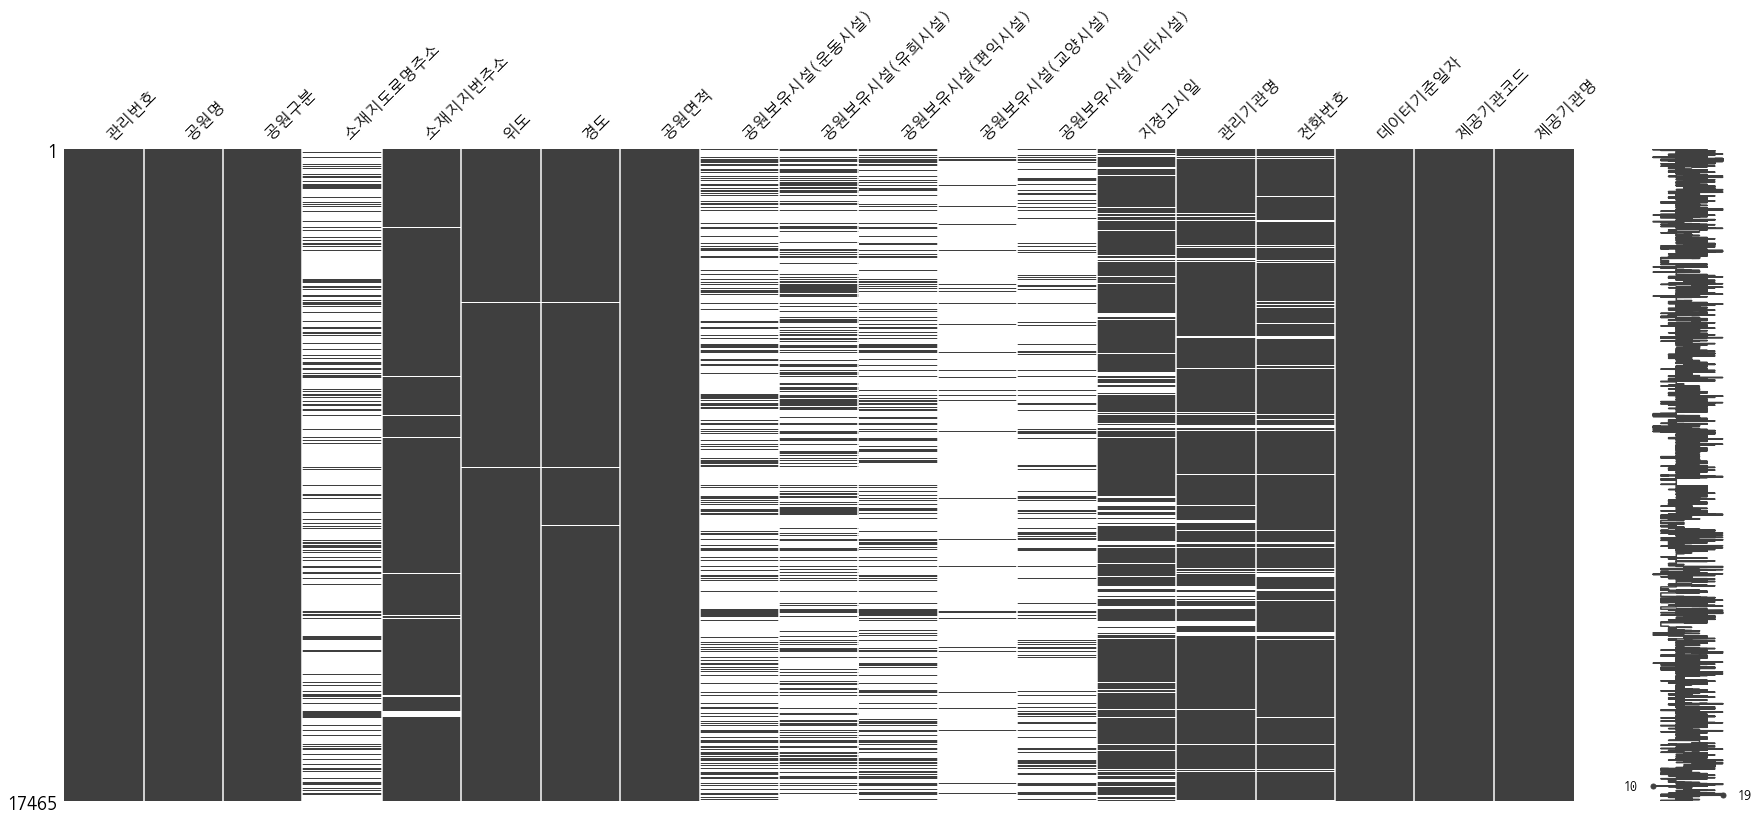

In [5]:
msno.matrix(park_202212, figsize=(30, 12))

In [6]:
park_202212.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object')

In [7]:
# drop() 함수로 불필요한 컬럼을 제거한다.
# columns 속성에 제거할 열 이름을 지정한다. 단, 제거할 열이 2개 이상일 경우 []로 묶어서 리스트로 넘겨야 한다.
# inplace=True 속성을 지정하면 실행 결과가 데이터프레임에 바로 적용된다.
park_202212.drop(columns=['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명'], inplace=True)
park_202212

관리번호              공원명   공원구분 소재지도로명주소                  소재지지번주소  \
0      47190-00127           백현체육공원   체육공원      NaN      경상북도 구미시 산동면 백현리 79   
1      47190-00128            둘모아공원  어린이공원      NaN       경상북도 구미시 봉곡동 584-2   
2      47190-00129            다붓소공원    소공원      NaN      경상북도 구미시 봉곡동 765 일원   
3      47190-00130            다붓1공원  어린이공원      NaN       경상북도 구미시 봉곡동 457-1   
4      47190-00131            다붓2공원  어린이공원      NaN         경상북도 구미시 봉곡동 767   
...            ...              ...    ...      ...                      ...   
17460  41461-00025      삼가지구 어린이공원1  어린이공원      NaN    경기도 용인시 처인구 삼가동 288-1   
17461  41461-00026       삼가1지구 체육공원   체육공원      NaN   경기도 용인시 처인구 삼가동 268-26   
17462  41461-00027      제107호 어린이공원  어린이공원      NaN  경기도 용인시 처인구 모현읍 왕산리 949   
17463  41461-00028      제105호 어린이공원  어린이공원      NaN   경기도 용인시 처인구 포곡읍 둔전리450   
17464  41465-00016  제15호 근린공원(수지공원)   근린공원      NaN     경기도 용인시 수지구 풍덕천동 696   

              위도          경도     공원면적 전화번호     데이터기준일자   제공기관코드     제공기관명  
0      36.186429  128.478491  90967.0  NaN  2022-06-09  5080000  경상북도 구미시  
1      36.148431  128.316594   4279.0  NaN  2022-06-09  5080000  경상북도 구미시  
2      36.155883  128.311526    805.0  NaN  2022-06-09  5080000  경상북도 구미시  
3      36.156392  128.314372   1585.0  NaN  2022-06-09  5080000  경상북도 구미시  
4      36.154808  128.314372   1637.0  NaN  2022-06-09  5080000  경상북도 구미시  
...          ...         ...      ...  ...         ...      ...       ...  
17460  37.238001  127.164249   4878.0  NaN  2022-11-23  4050000   경기도 용인시  
17461  37.238235  127.169302  17748.0  NaN  2022-11-23  4050000   경기도 용인시  
17462  37.333938  127.253862   5817.0  NaN  2022-11-23  4050000   경기도 용인시  
17463  37.272922  127.221799   2558.0  NaN  2022-11-23  4050000   경기도 용인시  
17464  37.323979  127.091005  15741.0  NaN  2022-11-23  4050000   경기도 용인시  

[17465 rows x 12 columns]

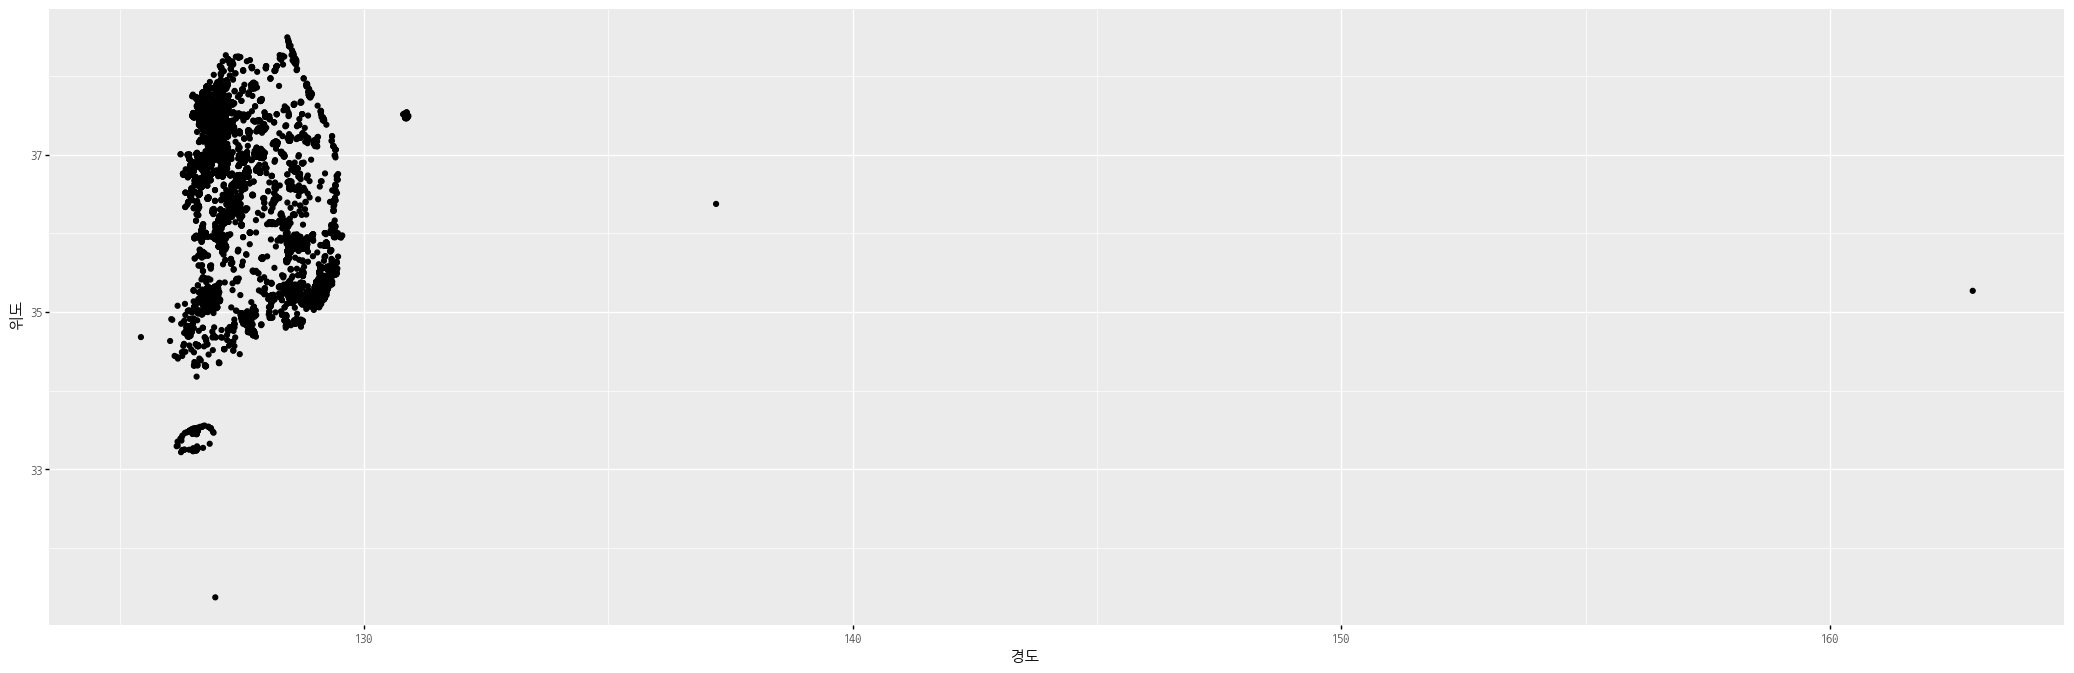

<ggplot: (-9223371859108759082)>

In [8]:
(
    ggplot(park_202212, aes(x='경도', y='위도')) 
        + geom_point()
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(26, 8))
)

<AxesSubplot:xlabel='경도', ylabel='위도'>

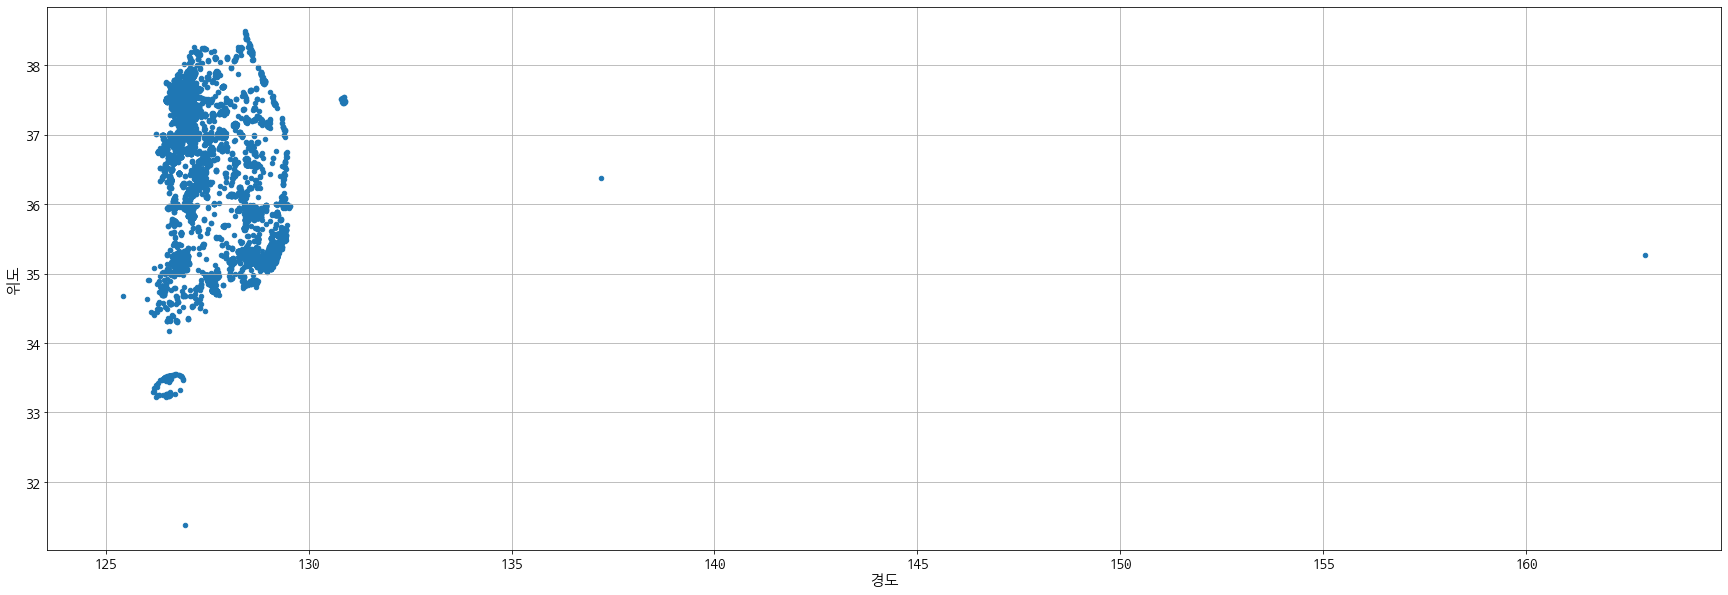

In [9]:
park_202212.plot.scatter(x='경도', y='위도', grid=True, figsize=(30, 10))

주소 데이터 전처리 => 도로명 주소가 NaN이면 지번 주소로 채운다.

In [10]:
park_202212.dtypes

관리번호         object
공원명          object
공원구분         object
소재지도로명주소     object
소재지지번주소      object
위도          float64
경도          float64
공원면적        float64
전화번호         object
데이터기준일자      object
제공기관코드       object
제공기관명        object
dtype: object

In [11]:
park_202212.공원면적.head()

0    90967.0
1     4279.0
2      805.0
3     1585.0
4     1637.0
Name: 공원면적, dtype: float64

In [12]:
# CircleMarker를 표시하기 위해 '공원면적' 열을 적당한 수식을 실행해서 '공원면적비율' 열을 만든다.
# 시리즈.apply(lambda 변수: 수식)
# 시리즈에 저장된 데이터가 lambda 뒤의 변수로 한 건씩 전달되고 ':' 다음음의 수식을 실행한 후 apply() 함수에 의해서 일괄 적용된다.
park_202212['공원면적비율'] = park_202212['공원면적'].apply(lambda x: np.sqrt(x) * 0.01)

In [13]:
park_202212

관리번호              공원명   공원구분 소재지도로명주소                  소재지지번주소  \
0      47190-00127           백현체육공원   체육공원      NaN      경상북도 구미시 산동면 백현리 79   
1      47190-00128            둘모아공원  어린이공원      NaN       경상북도 구미시 봉곡동 584-2   
2      47190-00129            다붓소공원    소공원      NaN      경상북도 구미시 봉곡동 765 일원   
3      47190-00130            다붓1공원  어린이공원      NaN       경상북도 구미시 봉곡동 457-1   
4      47190-00131            다붓2공원  어린이공원      NaN         경상북도 구미시 봉곡동 767   
...            ...              ...    ...      ...                      ...   
17460  41461-00025      삼가지구 어린이공원1  어린이공원      NaN    경기도 용인시 처인구 삼가동 288-1   
17461  41461-00026       삼가1지구 체육공원   체육공원      NaN   경기도 용인시 처인구 삼가동 268-26   
17462  41461-00027      제107호 어린이공원  어린이공원      NaN  경기도 용인시 처인구 모현읍 왕산리 949   
17463  41461-00028      제105호 어린이공원  어린이공원      NaN   경기도 용인시 처인구 포곡읍 둔전리450   
17464  41465-00016  제15호 근린공원(수지공원)   근린공원      NaN     경기도 용인시 수지구 풍덕천동 696   

              위도          경도     공원면적 전화번호     데이터기준일자   제공기관코드     제공기관명  \
0      36.186429  128.478491  90967.0  NaN  2022-06-09  5080000  경상북도 구미시   
1      36.148431  128.316594   4279.0  NaN  2022-06-09  5080000  경상북도 구미시   
2      36.155883  128.311526    805.0  NaN  2022-06-09  5080000  경상북도 구미시   
3      36.156392  128.314372   1585.0  NaN  2022-06-09  5080000  경상북도 구미시   
4      36.154808  128.314372   1637.0  NaN  2022-06-09  5080000  경상북도 구미시   
...          ...         ...      ...  ...         ...      ...       ...   
17460  37.238001  127.164249   4878.0  NaN  2022-11-23  4050000   경기도 용인시   
17461  37.238235  127.169302  17748.0  NaN  2022-11-23  4050000   경기도 용인시   
17462  37.333938  127.253862   5817.0  NaN  2022-11-23  4050000   경기도 용인시   
17463  37.272922  127.221799   2558.0  NaN  2022-11-23  4050000   경기도 용인시   
17464  37.323979  127.091005  15741.0  NaN  2022-11-23  4050000   경기도 용인시   

         공원면적비율  
0      3.016074  
1      0.654141  
2      0.283725  
3      0.398121  
4      0.404599  
...         ...  
17460  0.698427  
17461  1.332216  
17462  0.762693  
17463  0.505767  
17464  1.254631  

[17465 rows x 13 columns]

In [14]:
# 도로명 주소가 NaN인 데이터의 개수 => 지번 주소만 입력된 데이터의 개수
# 도로명 주소만 입력되고 지번 주소가 입력되지 않은 데이터는 도로명 주소 제도가 실행되고 난 후 조성된 공원이다.
park_202212['소재지도로명주소'].isnull().sum()

13351

In [15]:
# 도로명 주소는 입력되지 않고 지번 주소만 입력된 데이터
# 불린 인덱싱 작업시 and 조건이나 or이 사용되면 and(&) 또는 or(|) 연산에 참여하는 데이터에 관계 연산자가 사용되면 ()로 묶어준다.
# park_202212[(park_202212['소재지도로명주소'].isnull() == True) & (park_202212['소재지지번주소'].notnull() == True)]
# and 또는 or 연산에 참여하는 데이터 자체가 논리값일 경우 ()로 묶지 않아도 상관없다.
park_202212[park_202212['소재지도로명주소'].isnull() & park_202212['소재지지번주소'].notnull()]

관리번호              공원명   공원구분 소재지도로명주소                  소재지지번주소  \
0      47190-00127           백현체육공원   체육공원      NaN      경상북도 구미시 산동면 백현리 79   
1      47190-00128            둘모아공원  어린이공원      NaN       경상북도 구미시 봉곡동 584-2   
2      47190-00129            다붓소공원    소공원      NaN      경상북도 구미시 봉곡동 765 일원   
3      47190-00130            다붓1공원  어린이공원      NaN       경상북도 구미시 봉곡동 457-1   
4      47190-00131            다붓2공원  어린이공원      NaN         경상북도 구미시 봉곡동 767   
...            ...              ...    ...      ...                      ...   
17460  41461-00025      삼가지구 어린이공원1  어린이공원      NaN    경기도 용인시 처인구 삼가동 288-1   
17461  41461-00026       삼가1지구 체육공원   체육공원      NaN   경기도 용인시 처인구 삼가동 268-26   
17462  41461-00027      제107호 어린이공원  어린이공원      NaN  경기도 용인시 처인구 모현읍 왕산리 949   
17463  41461-00028      제105호 어린이공원  어린이공원      NaN   경기도 용인시 처인구 포곡읍 둔전리450   
17464  41465-00016  제15호 근린공원(수지공원)   근린공원      NaN     경기도 용인시 수지구 풍덕천동 696   

              위도          경도     공원면적 전화번호     데이터기준일자   제공기관코드     제공기관명  \
0      36.186429  128.478491  90967.0  NaN  2022-06-09  5080000  경상북도 구미시   
1      36.148431  128.316594   4279.0  NaN  2022-06-09  5080000  경상북도 구미시   
2      36.155883  128.311526    805.0  NaN  2022-06-09  5080000  경상북도 구미시   
3      36.156392  128.314372   1585.0  NaN  2022-06-09  5080000  경상북도 구미시   
4      36.154808  128.314372   1637.0  NaN  2022-06-09  5080000  경상북도 구미시   
...          ...         ...      ...  ...         ...      ...       ...   
17460  37.238001  127.164249   4878.0  NaN  2022-11-23  4050000   경기도 용인시   
17461  37.238235  127.169302  17748.0  NaN  2022-11-23  4050000   경기도 용인시   
17462  37.333938  127.253862   5817.0  NaN  2022-11-23  4050000   경기도 용인시   
17463  37.272922  127.221799   2558.0  NaN  2022-11-23  4050000   경기도 용인시   
17464  37.323979  127.091005  15741.0  NaN  2022-11-23  4050000   경기도 용인시   

         공원면적비율  
0      3.016074  
1      0.654141  
2      0.283725  
3      0.398121  
4      0.404599  
...         ...  
17460  0.698427  
17461  1.332216  
17462  0.762693  
17463  0.505767  
17464  1.254631  

[13351 rows x 13 columns]

In [16]:
# 지번 주소가 NaN인 데이터의 개수 => 도로명 주소만 입력된 데이터의 개수
park_202212['소재지지번주소'].isnull().sum()

339

In [17]:
# 도로명 주소는 입력되고 지번 주소가 입력되지 않은 데이터
park_202212[park_202212['소재지도로명주소'].notnull() & park_202212['소재지지번주소'].isnull()]

관리번호          공원명   공원구분                               소재지도로명주소  \
145    41360-00078   별내택지어린이공원3  어린이공원                  경기도 남양주시 별내동 별내3로 285   
599    45800-00001         서림공원   근린공원  전라북도 부안군 부안읍 동중리, 서외리, 행안면 역리 190전 일원   
1561   46150-00018         내동공원  어린이공원                 전라남도 순천시 승주읍 서평내동1길 26   
1562   46150-00019         승평공원  어린이공원                   전라남도 순천시 승주읍 승평동길 46   
1563   46150-00020         동내공원   근린공원                    전라남도 순천시 낙안면 삼일로 71   
...            ...          ...    ...                                    ...   
15914  28260-00006  여우재공원(이름변경)  어린이공원                        인천광역시 서구 고래울로 6   
15915  28260-00007        가좌울공원  어린이공원                       인천광역시 서구 고래울로 35   
15917  28260-00009         가좌공원  어린이공원                       인천광역시 서구 고래울로 12   
15920  28260-00012         가정공원  어린이공원                  인천광역시 서구 가정로 406번길 10   
16838  31170-00001        대왕암공원   근린공원                        울산광역시 동구 등대로 95   

      소재지지번주소         위도          경도      공원면적          전화번호     데이터기준일자  \
145       NaN  37.662716  127.116471    2743.0  031-590-8601  2022-12-07   
599       NaN  35.732919  126.731487  408986.0  063-580-4644  2022-05-26   
1561      NaN  35.015910  127.388269    3515.0  061-749-6330  2021-09-01   
1562      NaN  35.018377  127.376535    2600.0  061-749-6330  2021-09-01   
1563      NaN  34.904578  127.343855    6700.0  061-749-8831  2021-09-01   
...       ...        ...         ...       ...           ...         ...   
15914     NaN  37.488595  126.683657    1501.0  032-560-4800  2022-08-02   
15915     NaN  37.486735  126.685936    1920.0  032-560-4800  2022-08-02   
15917     NaN  37.487925  126.684202    7280.0  032-560-4800  2022-08-02   
15920     NaN  37.520940  126.674269    6612.0  032-560-4800  2022-08-02   
16838     NaN  35.490418  129.435245  942000.0  052-209-3753  2022-04-12   

        제공기관코드     제공기관명    공원면적비율  
145    3990000  경기도 남양주시  0.523737  
599    4790000  전라북도 부안군  6.395201  
1561   4820000  전라남도 순천시  0.592874  
1562   4820000  전라남도 순천시  0.509902  
1563   4820000  전라남도 순천시  0.818535  
...        ...       ...       ...  
15914  3560000  인천광역시 서구  0.387427  
15915  3560000  인천광역시 서구  0.438178  
15917  3560000  인천광역시 서구  0.853229  
15920  3560000  인천광역시 서구  0.813142  
16838  3710000  울산광역시 동구  9.705668  

[339 rows x 13 columns]

In [18]:
# 도로명 주소와 지번 주소가 모두 입력된 데이터
park_202212[park_202212['소재지도로명주소'].notnull() & park_202212['소재지지번주소'].notnull()]

관리번호                공원명   공원구분                    소재지도로명주소  \
6      47190-00133         산림문화생태근린공원   근린공원           경상북도 구미시 인덕1길 240   
81     41370-00109             원동수변공원   수변공원          경기도 오산시 부원로87번길 51   
82     41370-00110            가장동체육공원   체육공원           경기도 오산시 가장산업동로 49   
97     31140-00015              헐수정공원  어린이공원         울산광역시 남구 신복로23번길 16   
107    41430-00111               근린공원   근린공원            경기도 의왕시 초평동 19-1   
...            ...                ...    ...                         ...   
17421  42820-00013           화포3거리 공원    소공원     강원도 고성군 현내면 화진포길 204-25   
17426  42820-00018           초도리 통일공원    소공원        강원도 고성군 현내면 금강산로 186   
17436  41461-00001  제11호 근린공원(용인중앙공원)   근린공원  경기도 용인시 처인구 백옥대로1081번길 5-2   
17437  41461-00002    제32호 근린공원(번암공원)   근린공원     경기도 용인시 처인구 금학로277번길 16   
17448  41461-00013            천주교묘지공원   묘지공원  경기도 용인시 처인구 모현읍 오산로 154-62   

                         소재지지번주소         위도          경도       공원면적  \
6         경상북도 구미시 산동면 인덕리 산 5-1  36.165099  128.460465  1059228.0   
81              경기도 오산시 원동 715-8  37.140907  127.091507    17788.0   
82             경기도 오산시 가장동 382-4  37.164782  127.041189    11856.0   
97              울산광역시 남구 무거동 837  35.547388  129.258582     4078.6   
107             경기도 의왕시 초평동 19-1  37.318538  126.944477    14234.0   
...                          ...        ...         ...        ...   
17421        강원도 고성군 거진읍 화포리 496  38.460685  128.443610      500.0   
17426       강원도 고성군 현내면 초도리 산2-2  38.491555  128.428343     5631.0   
17436    경기도 용인시 처인구 김량장동 산37-16  37.231706  127.208376   579879.0   
17437        경기도 용인시 처인구 역북동 733  37.239140  127.194987    58886.0   
17448  경기도 용인시 처인구 모현읍 오산리 325-4  37.321104  127.146527   847474.0   

                전화번호     데이터기준일자   제공기관코드     제공기관명     공원면적비율  
6                NaN  2022-06-09  5080000  경상북도 구미시  10.291880  
81     031-8036-6473  2022-04-30  4000000   경기도 오산시   1.333717  
82     031-8036-6473  2022-04-30  4000000   경기도 오산시   1.088853  
97      052-226-5903  2022-03-31  3700000  울산광역시 남구   0.638639  
107     031-345-3083  2022-06-13  4030000   경기도 의왕시   1.193063  
...              ...         ...      ...       ...        ...  
17421   033-680-3423  2022-12-01  4340000   강원도 고성군   0.223607  
17426   033-680-3423  2022-12-01  4340000   강원도 고성군   0.750400  
17436            NaN  2022-11-23  4050000   경기도 용인시   7.614979  
17437            NaN  2022-11-23  4050000   경기도 용인시   2.426644  
17448            NaN  2022-11-23  4050000   경기도 용인시   9.205835  

[3775 rows x 13 columns]

In [19]:
# 도로명 주소와 지번 주소가 모두 입력되지 않은 데이터
park_202212[park_202212['소재지도로명주소'].isnull() & park_202212['소재지지번주소'].isnull()]

Empty DataFrame
Columns: [관리번호, 공원명, 공원구분, 소재지도로명주소, 소재지지번주소, 위도, 경도, 공원면적, 전화번호, 데이터기준일자, 제공기관코드, 제공기관명, 공원면적비율]
Index: []

In [20]:
# 도로명 주소에 입력된 '-'를(경상북도 칠곡군) 누락값으로 변경한다.
park_202212[park_202212['소재지도로명주소'] == '-']

관리번호              공원명   공원구분 소재지도로명주소                   소재지지번주소  \
11191  47850-00001             동락공원   근린공원        -     경상북도 칠곡군 석적읍 중리 495-5   
11192  47850-00002    인평제2공원(한마음공원)  어린이공원        -    경상북도 칠곡군 북삼읍 인평리 705-3   
11193  47850-00003     인평제3공원(허브공원)  어린이공원        -     경상북도 칠곡군 북삼읍 숭오리 15-1   
11195  47850-00005   인평제5공원(해오름1공원)  어린이공원        -     경상북도 칠곡군 북삼읍 인평리 1087   
12389  47850-00024           남율제2공원  어린이공원        -      경상북도 칠곡군 석적읍 남율리 산38   
12390  47850-00025           남율제3공원  어린이공원        -      경상북도 칠곡군 석적읍 남율리 235   
12391  47850-00026           남율제4공원  어린이공원        -  경상북도 칠곡군 석적읍 남율리 산 45-13   
12392  47850-00027           남율제5공원  어린이공원        -  경상북도 칠곡군 석적읍 남율리 산 44-20   
12393  47850-00028   중리제7공원(장승백이공원)  어린이공원        -    경상북도 칠곡군 석적읍 중리 161-16   
12394  47850-00029    중리제8공원(신맞이공원)  어린이공원        -     경상북도 칠곡군 석적읍 중리 172-3   
12395  47850-00030     중리제9공원(큰골공원)  어린이공원        -     경상북도 칠곡군 석적읍 중리 170-6   
12396  47850-00031             낙산공원   근린공원        -    경상북도 칠곡군 왜관읍 낙산리 690-1   
12398  47850-00033           삼청제1공원  어린이공원        -    경상북도 칠곡군 왜관읍 삼청리 477-7   
12399  47850-00034        왜관제4어린이공원  어린이공원        -     경상북도 칠곡군 왜관읍 왜관리 1449   
12400  47850-00035            왜관소공원    소공원        -     경상북도 칠곡군 왜관읍 왜관리 1542   
12401  47850-00036           아곡1소공원    소공원        -      경상북도 칠곡군 왜관읍 아곡리 829   
12402  47850-00037           아곡2소공원    소공원        -      경상북도 칠곡군 왜관읍 아곡리 816   
12403  47850-00038        연화공원(소공원)    소공원        -     경상북도 칠곡군 지천면 연화리 1035   
12404  47850-00039             한실공원   근린공원        -     경상북도 칠곡군 왜관읍 삼청리 1100   
12405  47850-00040       왜관3공단-1호공원   체육공원        -     경상북도 칠곡군 왜관읍 낙산리 1027   
12406  47850-00041       왜관3공단-2호공원    소공원        -     경상북도 칠곡군 왜관읍 낙산리 1115   
12407  47850-00042       왜관3공단-3호공원    소공원        -     경상북도 칠곡군 왜관읍 낙산리 1066   
12408  47850-00043       왜관3공단-4호공원   근린공원        -   경상북도 칠곡군 왜관읍 낙산리 1162-2   
12409  47850-00044         중리3공단소공원    소공원        -     경상북도 칠곡군 석적읍 중리 443-9   
12410  47850-00045             송림공원   수변공원        -      경상북도 칠곡군 동명면 구덕리 415   
12420  47850-00008     인평제7공원(나눔공원)  어린이공원        -   경상북도 칠곡군 북삼읍 인평리 1073-1   
12421  47850-00009     인평제8공원(하늘공원)  어린이공원        -   경상북도 칠곡군 북삼읍 인평리 1074-1   
12422  47850-00010         삼청리어린이공원  어린이공원        -   경상북도 칠곡군 왜관읍 삼청리 410-23   
12423  47850-00011    인평제9공원(늘푸른공원)  어린이공원        -    경상북도 칠곡군 북삼읍 인평리 271-2   
12424  47850-00012   인평제10공원(다모아공원)  어린이공원        -    경상북도 칠곡군 북삼읍 숭오리 26-10   
12425  47850-00013    인평제11공원(두리공원)  어린이공원        -     경상북도 칠곡군 북삼읍 숭오리 21-8   
12426  47850-00014   인평제12공원(은하수공원)  어린이공원        -    경상북도 칠곡군 북삼읍 인평리 671-1   
12428  47850-00016  인평제14공원(해오름2공원)  어린이공원        -     경상북도 칠곡군 북삼읍 인평리 1033   
12429  47850-00017     중리제1공원(섬계공원)  어린이공원        -       경상북도 칠곡군 석적읍 중리 187   
12430  47850-00018     중리제2공원(광암공원)  어린이공원        -       경상북도 칠곡군 석적읍 중리 211   
12431  47850-00019   중리제3공원(화산서당공원)  어린이공원        -       경상북도 칠곡군 석적읍 중리 230   
12432  47850-00020  중리제4공원(게이트볼장공원)  어린이공원        -     경상북도 칠곡군 석적읍 중리 238-4   
12433  47850-00021   중리제5공원(테니스장공원)  어린이공원        -     경상북도 칠곡군 석적읍 중리 247-3   
12434  47850-00022    중리제6공원(배수지공원)  어린이공원        -     경상북도 칠곡군 석적읍 중리 263-2   
12435  47850-00023           남율제1공원  어린이공원        -      경상북도 칠곡군 석적읍 남율리 143   

              위도          경도      공원면적          전화번호     데이터기준일자   제공기관코드  \
11191  36.086275  128.400711   95958.0           NaN  2020-07-16  5220000   
11192  36.063460  128.333056    1988.0  054-979-6832  2020-07-16  5220000   
11193  36.069315  128.333963    1586.0  054-979-6832  2020-07-16  5220000   
11195  36.068779  128.349499    3629.0  054-979-6832  2020-07-16  5220000   
12389  36.070102  128.409498    3406.0  054-979-6832  2020-07-16  5220000   
12390  36.064404  128.402607    4413.0  054-979-6832  2020-07-16  5220000   
12391  36.066446  128.409255    2033.0  054-979-6832  2020-07-16  5220000   
12392  36.067938  128.411450    3516.0  054-979-6832  2020-07-16  5220000   

In [21]:
park_202212.loc[park_202212['소재지도로명주소'] == '-', '소재지도로명주소'] = np.NaN

In [22]:
park_202212[park_202212['제공기관명'] == '경상북도 칠곡군']

관리번호              공원명   공원구분                  소재지도로명주소  \
11191  47850-00001             동락공원   근린공원                       NaN   
11192  47850-00002    인평제2공원(한마음공원)  어린이공원                       NaN   
11193  47850-00003     인평제3공원(허브공원)  어린이공원                       NaN   
11194  47850-00004   인평제4공원(그루터기공원)  어린이공원                       NaN   
11195  47850-00005   인평제5공원(해오름1공원)  어린이공원                       NaN   
12389  47850-00024           남율제2공원  어린이공원                       NaN   
12390  47850-00025           남율제3공원  어린이공원                       NaN   
12391  47850-00026           남율제4공원  어린이공원                       NaN   
12392  47850-00027           남율제5공원  어린이공원                       NaN   
12393  47850-00028   중리제7공원(장승백이공원)  어린이공원                       NaN   
12394  47850-00029    중리제8공원(신맞이공원)  어린이공원                       NaN   
12395  47850-00030     중리제9공원(큰골공원)  어린이공원                       NaN   
12396  47850-00031             낙산공원   근린공원                       NaN   
12397  47850-00032             왜관공원  어린이공원      경상북도 칠곡군 왜관읍 중앙로 266   
12398  47850-00033           삼청제1공원  어린이공원                       NaN   
12399  47850-00034        왜관제4어린이공원  어린이공원                       NaN   
12400  47850-00035            왜관소공원    소공원                       NaN   
12401  47850-00036           아곡1소공원    소공원                       NaN   
12402  47850-00037           아곡2소공원    소공원                       NaN   
12403  47850-00038        연화공원(소공원)    소공원                       NaN   
12404  47850-00039             한실공원   근린공원                       NaN   
12405  47850-00040       왜관3공단-1호공원   체육공원                       NaN   
12406  47850-00041       왜관3공단-2호공원    소공원                       NaN   
12407  47850-00042       왜관3공단-3호공원    소공원                       NaN   
12408  47850-00043       왜관3공단-4호공원   근린공원                       NaN   
12409  47850-00044         중리3공단소공원    소공원                       NaN   
12410  47850-00045             송림공원   수변공원                       NaN   
12418  47850-00006     인평제2공원(체육공원)   근린공원       경상북도 칠곡군 북삼읍 북삼로 65   
12419  47850-00007             금산공원   근린공원  경상북도 칠곡군 왜관읍 공단로4길 18-26   
12420  47850-00008     인평제7공원(나눔공원)  어린이공원                       NaN   
12421  47850-00009     인평제8공원(하늘공원)  어린이공원                       NaN   
12422  47850-00010         삼청리어린이공원  어린이공원                       NaN   
12423  47850-00011    인평제9공원(늘푸른공원)  어린이공원                       NaN   
12424  47850-00012   인평제10공원(다모아공원)  어린이공원                       NaN   
12425  47850-00013    인평제11공원(두리공원)  어린이공원                       NaN   
12426  47850-00014   인평제12공원(은하수공원)  어린이공원                       NaN   
12427  47850-00015    인평제13공원(초록공원)  어린이공원                       NaN   
12428  47850-00016  인평제14공원(해오름2공원)  어린이공원                       NaN   
12429  47850-00017     중리제1공원(섬계공원)  어린이공원                       NaN   
12430  47850-00018     중리제2공원(광암공원)  어린이공원                       NaN   
12431  47850-00019   중리제3공원(화산서당공원)  어린이공원                       NaN   
12432  47850-00020  중리제4공원(게이트볼장공원)  어린이공원                       NaN   
12433  47850-00021   중리제5공원(테니스장공원)  어린이공원                       NaN   
12434  47850-00022    중리제6공원(배수지공원)  어린이공원                       NaN   
12435  47850-00023           남율제1공원  어린이공원                       NaN   

                        소재지지번주소         위도          경도      공원면적  \
11191     경상북도 칠곡군 석적읍 중리 495-5  36.086275  128.400711   95958.0   
11192    경상북도 칠곡군 북삼읍 인평리 705-3  36.063460  128.333056    1988.0   
11193     경상북도 칠곡군 북삼읍 숭오리 15-1  36.069315  128.333963    1586.0   
11194    경상북도 칠곡군 북삼읍 인평리 676-1  36.068418  128.340790    3875.0   
11195     경상북도 칠곡군 북삼읍 인평리 1087  36.068779  128.349499    3629.0   
12389      경상북도 칠곡군 석적읍 남율리 산38  36.070102  128.409498    3406.0   
12390      경상북도 칠곡군 석적읍 남율리 235  36.064404  128.402607    4413.0   
12391  경상북도 칠곡군 석적읍 남율리 산 45-13  36.066446  128.409255    2033.0   
12392  경상북도 칠곡군 석적읍 남율리 산 44-20  36.067938  128.411450    3516.0   
12393    경상북도 칠곡군 석적읍

In [23]:
# 도로명 주소가 NaN인 데이터를 지번 주소로 채운다.
park_202212['소재지도로명주소'].fillna(park_202212['소재지지번주소'], inplace=True)

In [24]:
park_202212['소재지도로명주소'].isnull().sum()

0

In [25]:
park_202212[park_202212['소재지도로명주소'].isnull()]

Empty DataFrame
Columns: [관리번호, 공원명, 공원구분, 소재지도로명주소, 소재지지번주소, 위도, 경도, 공원면적, 전화번호, 데이터기준일자, 제공기관코드, 제공기관명, 공원면적비율]
Index: []

In [26]:
park_202212[park_202212['제공기관코드'] == '5220000']

관리번호              공원명   공원구분                  소재지도로명주소  \
11191  47850-00001             동락공원   근린공원     경상북도 칠곡군 석적읍 중리 495-5   
11192  47850-00002    인평제2공원(한마음공원)  어린이공원    경상북도 칠곡군 북삼읍 인평리 705-3   
11193  47850-00003     인평제3공원(허브공원)  어린이공원     경상북도 칠곡군 북삼읍 숭오리 15-1   
11194  47850-00004   인평제4공원(그루터기공원)  어린이공원    경상북도 칠곡군 북삼읍 인평리 676-1   
11195  47850-00005   인평제5공원(해오름1공원)  어린이공원     경상북도 칠곡군 북삼읍 인평리 1087   
12389  47850-00024           남율제2공원  어린이공원      경상북도 칠곡군 석적읍 남율리 산38   
12390  47850-00025           남율제3공원  어린이공원      경상북도 칠곡군 석적읍 남율리 235   
12391  47850-00026           남율제4공원  어린이공원  경상북도 칠곡군 석적읍 남율리 산 45-13   
12392  47850-00027           남율제5공원  어린이공원  경상북도 칠곡군 석적읍 남율리 산 44-20   
12393  47850-00028   중리제7공원(장승백이공원)  어린이공원    경상북도 칠곡군 석적읍 중리 161-16   
12394  47850-00029    중리제8공원(신맞이공원)  어린이공원     경상북도 칠곡군 석적읍 중리 172-3   
12395  47850-00030     중리제9공원(큰골공원)  어린이공원     경상북도 칠곡군 석적읍 중리 170-6   
12396  47850-00031             낙산공원   근린공원    경상북도 칠곡군 왜관읍 낙산리 690-1   
12397  47850-00032             왜관공원  어린이공원      경상북도 칠곡군 왜관읍 중앙로 266   
12398  47850-00033           삼청제1공원  어린이공원    경상북도 칠곡군 왜관읍 삼청리 477-7   
12399  47850-00034        왜관제4어린이공원  어린이공원     경상북도 칠곡군 왜관읍 왜관리 1449   
12400  47850-00035            왜관소공원    소공원     경상북도 칠곡군 왜관읍 왜관리 1542   
12401  47850-00036           아곡1소공원    소공원      경상북도 칠곡군 왜관읍 아곡리 829   
12402  47850-00037           아곡2소공원    소공원      경상북도 칠곡군 왜관읍 아곡리 816   
12403  47850-00038        연화공원(소공원)    소공원     경상북도 칠곡군 지천면 연화리 1035   
12404  47850-00039             한실공원   근린공원     경상북도 칠곡군 왜관읍 삼청리 1100   
12405  47850-00040       왜관3공단-1호공원   체육공원     경상북도 칠곡군 왜관읍 낙산리 1027   
12406  47850-00041       왜관3공단-2호공원    소공원     경상북도 칠곡군 왜관읍 낙산리 1115   
12407  47850-00042       왜관3공단-3호공원    소공원     경상북도 칠곡군 왜관읍 낙산리 1066   
12408  47850-00043       왜관3공단-4호공원   근린공원   경상북도 칠곡군 왜관읍 낙산리 1162-2   
12409  47850-00044         중리3공단소공원    소공원     경상북도 칠곡군 석적읍 중리 443-9   
12410  47850-00045             송림공원   수변공원      경상북도 칠곡군 동명면 구덕리 415   
12418  47850-00006     인평제2공원(체육공원)   근린공원       경상북도 칠곡군 북삼읍 북삼로 65   
12419  47850-00007             금산공원   근린공원  경상북도 칠곡군 왜관읍 공단로4길 18-26   
12420  47850-00008     인평제7공원(나눔공원)  어린이공원   경상북도 칠곡군 북삼읍 인평리 1073-1   
12421  47850-00009     인평제8공원(하늘공원)  어린이공원   경상북도 칠곡군 북삼읍 인평리 1074-1   
12422  47850-00010         삼청리어린이공원  어린이공원   경상북도 칠곡군 왜관읍 삼청리 410-23   
12423  47850-00011    인평제9공원(늘푸른공원)  어린이공원    경상북도 칠곡군 북삼읍 인평리 271-2   
12424  47850-00012   인평제10공원(다모아공원)  어린이공원    경상북도 칠곡군 북삼읍 숭오리 26-10   
12425  47850-00013    인평제11공원(두리공원)  어린이공원     경상북도 칠곡군 북삼읍 숭오리 21-8   
12426  47850-00014   인평제12공원(은하수공원)  어린이공원    경상북도 칠곡군 북삼읍 인평리 671-1   
12427  47850-00015    인평제13공원(초록공원)  어린이공원     경상북도 칠곡군 북삼읍 인평리 1025   
12428  47850-00016  인평제14공원(해오름2공원)  어린이공원     경상북도 칠곡군 북삼읍 인평리 1033   
12429  47850-00017     중리제1공원(섬계공원)  어린이공원       경상북도 칠곡군 석적읍 중리 187   
12430  47850-00018     중리제2공원(광암공원)  어린이공원       경상북도 칠곡군 석적읍 중리 211   
12431  47850-00019   중리제3공원(화산서당공원)  어린이공원       경상북도 칠곡군 석적읍 중리 230   
12432  47850-00020  중리제4공원(게이트볼장공원)  어린이공원     경상북도 칠곡군 석적읍 중리 238-4   
12433  47850-00021   중리제5공원(테니스장공원)  어린이공원     경상북도 칠곡군 석적읍 중리 247-3   
12434  47850-00022    중리제6공원(배수지공원)  어린이공원     경상북도 칠곡군 석적읍 중리 263-2   
12435  47850-00023           남율제1공원  어린이공원      경상북도 칠곡군 석적읍 남율리 143   

                        소재지지번주소         위도          경도      공원면적  \
11191     경상북도 칠곡군 석적읍 중리 495-5  36.086275  128.400711   95958.0   
11192    경상북도 칠곡군 북삼읍 인평리 705-3  36.063460  128.333056    1988.0   
11193     경상북도 칠곡군 북삼읍 숭오리 15-1  36.069315  128.333963    1586.0   
11194    경상북도 칠곡군 북삼읍 인평리 676-1  36.068418  128.340790    3875.0   
11195     경상북도 칠곡군 북삼읍 인평리 1087  36.068779  128.349499    3629.0   
12389      경상북도 칠곡군 석적읍 남율리 산38  36.070102  128.409498    3406.0   
12390      경상북도 칠곡군 석적읍 남율리 235  36.064404  128.402607    4413.0   
12391  경상북도 칠곡군 석적읍 남율리 산 45-13  36.066446  128.409255    2033.0   
12392  경상북도 칠곡군 석적읍 남율리 산 44-20  36.067938  128.411450    3516.0   
12393    경상북도 칠곡군 석적읍

주소 데이터 전처리 => 도로명 주소에서 공백을 경계로 주소를 분리해서 4번째 레벨까지 추가한다.

In [27]:
# split() 함수 실행시 expand=True 옵션을 지정하면 구분자를 경계로 분리된 결과가 데이터프레임으로 만들어진다.
park_202212['소재지도로명주소'].str.split(' ', expand=True)

0    1    2      3       4     5     6     7     8
0      경상북도  구미시  산동면    백현리      79  None  None  None  None
1      경상북도  구미시  봉곡동  584-2    None  None  None  None  None
2      경상북도  구미시  봉곡동    765      일원  None  None  None  None
3      경상북도  구미시  봉곡동  457-1    None  None  None  None  None
4      경상북도  구미시  봉곡동    767    None  None  None  None  None
...     ...  ...  ...    ...     ...   ...   ...   ...   ...
17460   경기도  용인시  처인구    삼가동   288-1  None  None  None  None
17461   경기도  용인시  처인구    삼가동  268-26  None  None  None  None
17462   경기도  용인시  처인구    모현읍     왕산리   949  None  None  None
17463   경기도  용인시  처인구    포곡읍  둔전리450  None  None  None  None
17464   경기도  용인시  수지구   풍덕천동     696  None  None  None  None

[17465 rows x 9 columns]

In [28]:
# 도로명 주소에서 공백으로 분리한 주소를 4번째 레벨까지 추가한다.
park_202212['시도'] = park_202212['소재지도로명주소'].str.split(' ', expand=True)[0]
park_202212['주소1'] = park_202212['소재지도로명주소'].str.split(' ', expand=True)[1]
park_202212['주소2'] = park_202212['소재지도로명주소'].str.split(' ', expand=True)[2]
park_202212['주소3'] = park_202212['소재지도로명주소'].str.split(' ', expand=True)[3]
park_202212.head()

관리번호     공원명   공원구분             소재지도로명주소              소재지지번주소  \
0  47190-00127  백현체육공원   체육공원  경상북도 구미시 산동면 백현리 79  경상북도 구미시 산동면 백현리 79   
1  47190-00128   둘모아공원  어린이공원   경상북도 구미시 봉곡동 584-2   경상북도 구미시 봉곡동 584-2   
2  47190-00129   다붓소공원    소공원  경상북도 구미시 봉곡동 765 일원  경상북도 구미시 봉곡동 765 일원   
3  47190-00130   다붓1공원  어린이공원   경상북도 구미시 봉곡동 457-1   경상북도 구미시 봉곡동 457-1   
4  47190-00131   다붓2공원  어린이공원     경상북도 구미시 봉곡동 767     경상북도 구미시 봉곡동 767   

          위도          경도     공원면적 전화번호     데이터기준일자   제공기관코드     제공기관명  \
0  36.186429  128.478491  90967.0  NaN  2022-06-09  5080000  경상북도 구미시   
1  36.148431  128.316594   4279.0  NaN  2022-06-09  5080000  경상북도 구미시   
2  36.155883  128.311526    805.0  NaN  2022-06-09  5080000  경상북도 구미시   
3  36.156392  128.314372   1585.0  NaN  2022-06-09  5080000  경상북도 구미시   
4  36.154808  128.314372   1637.0  NaN  2022-06-09  5080000  경상북도 구미시   

     공원면적비율    시도  주소1  주소2    주소3  
0  3.016074  경상북도  구미시  산동면    백현리  
1  0.654141  경상북도  구미시  봉곡동  584-2  
2  0.283725  경상북도  구미시  봉곡동    765  
3  0.398121  경상북도  구미시  봉곡동  457-1  
4  0.404599  경상북도  구미시  봉곡동    767

위도, 경도 전처리 => 대한민국 범위를 벗어난 위도와 경도와 입력되지 않은 위도와 경도를 찾아 처리한다.

In [29]:
park_202212[['위도', '경도']].describe()

위도            경도
count  17425.000000  17426.000000
mean      36.502085    127.456778
std        1.031458      0.882256
min       31.373336    125.432215
25%       35.560778    126.864593
50%       36.784219    127.095656
75%       37.431027    127.959183
max       38.491555    162.920004

In [30]:
# 위도와 경도가 대한민국 범위를 벗어난 데이터를 추출한다.
park_202212_error = park_202212[(park_202212['위도'] < 32) | (park_202212['경도'] > 132)]
print(park_202212_error.shape)
park_202212_error

(3, 17)


관리번호          공원명  공원구분                  소재지도로명주소  \
10911  43113-00080  근린공원5(만수공원)  근린공원  충청북도 청주시 흥덕구 오송읍 만수리 512   
13860  46710-00112       공원-112   소공원   전라남도 담양군 대전면 성산리 434-13   
14633  41173-00113      제24호소공원   소공원      경기도 안양시 동안구 호계동 1308   

                        소재지지번주소         위도          경도     공원면적  \
10911  충청북도 청주시 흥덕구 오송읍 만수리 512  36.374204  137.202661  33258.0   
13860   전라남도 담양군 대전면 성산리 434-13  35.269633  162.920004    743.0   
14633      경기도 안양시 동안구 호계동 1308  31.373336  126.954253   2159.0   

                전화번호     데이터기준일자   제공기관코드     제공기관명    공원면적비율    시도  주소1  주소2  \
10911   043-201-4433  2020-07-16  5710000  충청북도 청주시  1.823678  충청북도  청주시  흥덕구   
13860   061-380-2574  2022-02-07  4850000  전라남도 담양군  0.272580  전라남도  담양군  대전면   
14633  031-8045-5022  2022-11-15  3830000   경기도 안양시  0.464650   경기도  안양시  동안구   

       주소3  
10911  오송읍  
13860  성산리  
14633  호계동

In [31]:
# 위도 또는 경도가 입력되지 않은 데이터를 추출한다.
park_202212_error = park_202212[park_202212['위도'].isnull() | park_202212['경도'].isnull()]
print(park_202212_error.shape)
park_202212_error

(56, 17)


관리번호             공원명   공원구분                    소재지도로명주소  \
4126   11140-00024            마루공원    소공원       서울특별시 중구 다산동 432-1918   
4131   11140-00029      신당제11구역1공원    소공원         서울특별시 중구 신당동 85-549   
4132   11140-00030      신당제11구역2공원    소공원         서울특별시 중구 신당동 85-288   
4138   11140-00036           저동3공원    소공원          서울특별시 중구 저동2가 89-1   
4139   11140-00037        만리2구역3공원    소공원        서울특별시 중구 만리동2가 12-53   
4930   11140-00003            응봉공원   근린공원            서울특별시 중구 신당동 산36   
4936   11140-00009            청구공원  어린이공원          서울특별시 중구 청구동 842-1   
4939   11140-00012           늘푸른공원  어린이공원        서울특별시 중구 다산동 432-917   
8542   46720-00001            교죽공원   근린공원        전라남도 곡성군 곡성읍 죽동리 200   
8543   46720-00002            충의공원   근린공원        전라남도 곡성군 곡성읍 묘천리 331   
8544   46720-00003            오지공원    소공원        전라남도 곡성군 오곡면 오지리 647   
8545   46720-00004            리문공원  어린이공원      전라남도 곡성군 옥과면 리문리 254-4   
8546   46720-00005            햇살공원    소공원     전라남도 곡성군 죽곡면 태평리 산105-1   
8547   46720-00006        곡성생활체육공원   체육공원       전라남도 곡성군 곡성읍 교촌리 44-3   
8548   46720-00007            묘천공원   근린공원         전라남도 곡성군 곡성읍 묘천리 76   
8549   46720-00008            옥과공원    소공원      전라남도 곡성군 옥과면 옥과리 104-9   
8550   46720-00009           심청마을1    소공원        전라남도 곡성군 오곡면 송정리 225   
8551   46720-00010           심청마을2    소공원        전라남도 곡성군 오곡면 송정리 213   
8552   46720-00011           심청마을3    소공원        전라남도 곡성군 오곡면 송정리 217   
8553   46720-00012             운곡1    소공원         전라남도 곡성군 오산면 운곡리 88   
8554   46720-00013             운곡2    소공원      전라남도 곡성군 오산면 운곡리 88-16   
8556   46720-00015            헬스팜1    소공원        전라남도 곡성군 석곡면 연반리 산19   
8557   46720-00016            헬스팜2    소공원        전라남도 곡성군 석곡면 연반리 310   
8558   46720-00017            침실습지   수변공원        전라남도 곡성군 오곡면 오지리 135   
9067   45111-00094            안행공원  어린이공원      전라북도 전주시 완산구 효자동1가 681   
9116   45111-00045            가락구역    소공원   전라북도 전주시 완산구 서완산동1가 574-3   
9403   45111-00140          역사도심공원    소공원     전라북도 전주시 완산구 고사동 324-14   
9408   45113-00081           서찰방공원    소공원     전라북도 전주시 덕진구 만성동 1168-8   
9421   45113-00095          에코시티3호    소공원  전라북도 전주시 덕진구 송천동 2가 377-66   
9424   45113-00098          에코시티6호    소공원  전라북도 전주시 덕진구 송천동 2가 377-66   
9438   45113-00059            월방공원    소공원     전라북도 전주시 덕진구 만성동 1194-3   
9688   44770-25321    (신청사)어린이공원 2  어린이공원       충청남도 서천군 서천읍 군사리 60-5   
9690   44770-25321       (신청사) 소공원    소공원       충청남도 서천군 서천읍 군사리 51-8   
9814   11710-00153  위례별(위례 근린공원7호)   근린공원       서울특별시 송파구 장지동 393임 일원   
9827   11710-00121              희망  어린이공원           서울특별시 송파구 문정동 103   
9831   11710-00125              능안     기타         서울특별시 송파구 거여동 296-2   
9836   11710-00130       솔향(거마재정비)   근린공원      서울특별시 송파구 마천동 199-3 일대   
9839   11710-00133      위례 근린공원12호   근린공원       서울특별시 송파구 장지동 산29임 일원   
9844   11710-00138      위례 어린이공원1호  어린이공원    서울특별시 송파구 거여동 산71-14잡 일원   
9845   11710-00139         잠실미성크로바  어린이공원       서울특별시 송파구 신천동 17-6 일원   
9849   11710-00143      거여1(거마재정비)    소공원    서울특별시 송파구 거여동 181-143 일대   
9857   11710-00091              쌀섬  어린이공원     서울특별시 송파구 백제고분로18길 2036   
9858   11710-00092              아랑  어린이공원            서울특별시 송파구 송파동 44   
9878   11710-00112              큰솔  어린이공원            서울특별시 송파구 오금동 47   
9881   11710-00115              한림  어린이공원         서울특별시 송파구 장지동 834-2   
9884   11710-00118             호돌이  어린이공원        서울특별시 송파구 문정동 150-11   
9885   11710-00119             호순이  어린이공원         서울특별시 송파구 문정동 150-3   
10093  11710-00008              널문   근린공원       서울특별시 송파구 마천동 581,598   
10096  11710-00011             두댐이   근린공원             서울특별시 송파구 문정동 2   
10103  11710-00018              부리   근린공원          서울특별시 송파구 잠실동 22-5   
10106  11710-00021              새내   근린공원          서울특별시 송파구 신천동 17-9   
10108  11710-00023              송이   근린공원           서울특별시 송파구 송파동 169   
16707  11170-00019           새푸리공원    소공원           서울특별시 용산구 이촌동 399   
16711  11170-00023        신창동어린이공원  어린이공원           서울특별시 용산구 신창동 100   

In [32]:
# 위도와 경도가 올바른 데이터만 추출한다.
park_202212_ok = park_202212[(park_202212['위도'] >= 32) & (park_202212['경도'] <= 132)]
park_202212_ok
# 17465 - 3 - 56 = 17406

관리번호              공원명   공원구분                 소재지도로명주소  \
0      47190-00127           백현체육공원   체육공원      경상북도 구미시 산동면 백현리 79   
1      47190-00128            둘모아공원  어린이공원       경상북도 구미시 봉곡동 584-2   
2      47190-00129            다붓소공원    소공원      경상북도 구미시 봉곡동 765 일원   
3      47190-00130            다붓1공원  어린이공원       경상북도 구미시 봉곡동 457-1   
4      47190-00131            다붓2공원  어린이공원         경상북도 구미시 봉곡동 767   
...            ...              ...    ...                      ...   
17460  41461-00025      삼가지구 어린이공원1  어린이공원    경기도 용인시 처인구 삼가동 288-1   
17461  41461-00026       삼가1지구 체육공원   체육공원   경기도 용인시 처인구 삼가동 268-26   
17462  41461-00027      제107호 어린이공원  어린이공원  경기도 용인시 처인구 모현읍 왕산리 949   
17463  41461-00028      제105호 어린이공원  어린이공원   경기도 용인시 처인구 포곡읍 둔전리450   
17464  41465-00016  제15호 근린공원(수지공원)   근린공원     경기도 용인시 수지구 풍덕천동 696   

                       소재지지번주소         위도          경도     공원면적 전화번호  \
0          경상북도 구미시 산동면 백현리 79  36.186429  128.478491  90967.0  NaN   
1           경상북도 구미시 봉곡동 584-2  36.148431  128.316594   4279.0  NaN   
2          경상북도 구미시 봉곡동 765 일원  36.155883  128.311526    805.0  NaN   
3           경상북도 구미시 봉곡동 457-1  36.156392  128.314372   1585.0  NaN   
4             경상북도 구미시 봉곡동 767  36.154808  128.314372   1637.0  NaN   
...                        ...        ...         ...      ...  ...   
17460    경기도 용인시 처인구 삼가동 288-1  37.238001  127.164249   4878.0  NaN   
17461   경기도 용인시 처인구 삼가동 268-26  37.238235  127.169302  17748.0  NaN   
17462  경기도 용인시 처인구 모현읍 왕산리 949  37.333938  127.253862   5817.0  NaN   
17463   경기도 용인시 처인구 포곡읍 둔전리450  37.272922  127.221799   2558.0  NaN   
17464     경기도 용인시 수지구 풍덕천동 696  37.323979  127.091005  15741.0  NaN   

          데이터기준일자   제공기관코드     제공기관명    공원면적비율    시도  주소1  주소2    주소3  
0      2022-06-09  5080000  경상북도 구미시  3.016074  경상북도  구미시  산동면    백현리  
1      2022-06-09  5080000  경상북도 구미시  0.654141  경상북도  구미시  봉곡동  584-2  
2      2022-06-09  5080000  경상북도 구미시  0.283725  경상북도  구미시  봉곡동    765  
3      2022-06-09  5080000  경상북도 구미시  0.398121  경상북도  구미시  봉곡동  457-1  
4      2022-06-09  5080000  경상북도 구미시  0.404599  경상북도  구미시  봉곡동    767  
...           ...      ...       ...       ...   ...  ...  ...    ...  
17460  2022-11-23  4050000   경기도 용인시  0.698427   경기도  용인시  처인구    삼가동  
17461  2022-11-23  4050000   경기도 용인시  1.332216   경기도  용인시  처인구    삼가동  
17462  2022-11-23  4050000   경기도 용인시  0.762693   경기도  용인시  처인구    모현읍  
17463  2022-11-23  4050000   경기도 용인시  0.505767   경기도  용인시  처인구    포곡읍  
17464  2022-11-23  4050000   경기도 용인시  1.254631   경기도  용인시  수지구   풍덕천동  

[17406 rows x 17 columns]

'주소1' 컬럼이 '대전'인 데이터를 '대전광역시'로 수정한다.

In [33]:
park_202212_ok['시도'].value_counts()

경기도        4426
충청남도       1762
서울특별시      1759
경상남도       1163
전라남도       1038
경상북도       1019
광주광역시       932
충청북도        789
인천광역시       690
부산광역시       674
전라북도        664
강원도         632
대구광역시       631
울산광역시       467
대전광역시       444
제주특별자치도     245
세종특별자치시      70
대전            1
Name: 시도, dtype: int64

In [34]:
# 주소1 컬럼이 '대전'인 데이터를 '대전광역시'로 수정한다.
# park_202212_ok.loc[park_202212_ok['시도'] == '대전', '시도'] = '대전광역시'
park_202212_ok['시도'][park_202212_ok['시도'] == '대전'] = '대전광역시'

In [35]:
park_202212_ok['시도'].value_counts()

경기도        4426
충청남도       1762
서울특별시      1759
경상남도       1163
전라남도       1038
경상북도       1019
광주광역시       932
충청북도        789
인천광역시       690
부산광역시       674
전라북도        664
강원도         632
대구광역시       631
울산광역시       467
대전광역시       445
제주특별자치도     245
세종특별자치시      70
Name: 시도, dtype: int64

시도별 공원 데이터 시각화

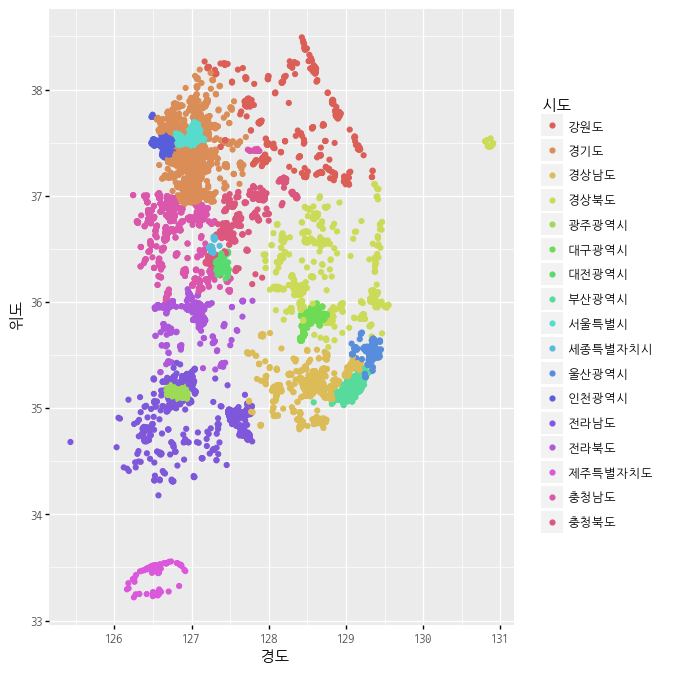

<ggplot: (-9223371859009873846)>

In [36]:
(
    ggplot(park_202212_ok, aes(x='경도', y='위도', color='시도'))
        + geom_point()
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(6, 8))
)

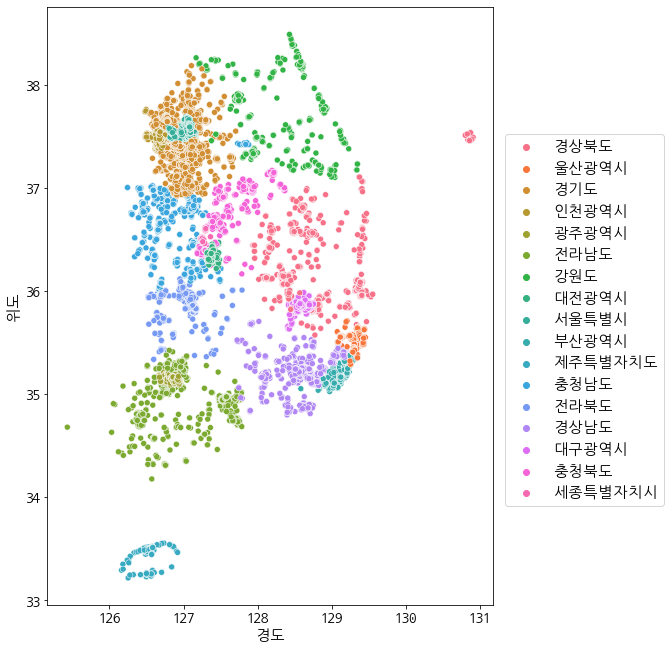

In [37]:
plt.figure(figsize=(8, 11))
sns.scatterplot(data=park_202212_ok, x='경도', y='위도', hue='시도')
plt.legend(loc=1, bbox_to_anchor=(1.4, 0.8)) # 범례 위치
plt.show()

공원 구분별 분포

In [38]:
park_202212_ok['공원구분'].value_counts()

어린이공원       9072
근린공원        3917
소공원         2603
기타           547
문화공원         374
수변공원         326
체육공원         250
역사공원         185
마을마당          49
묘지공원          38
기타공원          30
도시농업공원         7
도시자연공원         3
주제공원           2
도시자연공원구역       2
어린인공원          1
Name: 공원구분, dtype: int64

In [39]:
park_202212_ok.loc[park_202212_ok['공원구분'] == '기타공원', '공원구분'] = '기타'
park_202212_ok.loc[park_202212_ok['공원구분'] == '어린인공원', '공원구분'] = '어린이공원'
park_202212_ok.loc[park_202212_ok['공원구분'] == '도시자연공원구역', '공원구분'] = '도시자연공원'

In [40]:
park_202212_ok['공원구분'].value_counts()

어린이공원     9073
근린공원      3917
소공원       2603
기타         577
문화공원       374
수변공원       326
체육공원       250
역사공원       185
마을마당        49
묘지공원        38
도시농업공원       7
도시자연공원       5
주제공원         2
Name: 공원구분, dtype: int64

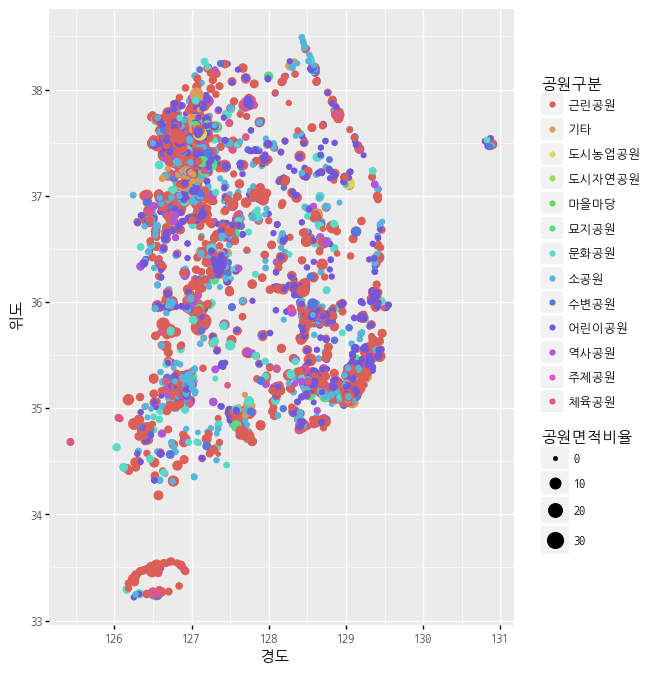

<ggplot: (177844841827)>

In [41]:
(
    ggplot(park_202212_ok, aes(x='경도', y='위도', color='공원구분', size='공원면적비율'))
        + geom_point()
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(6, 8))
)

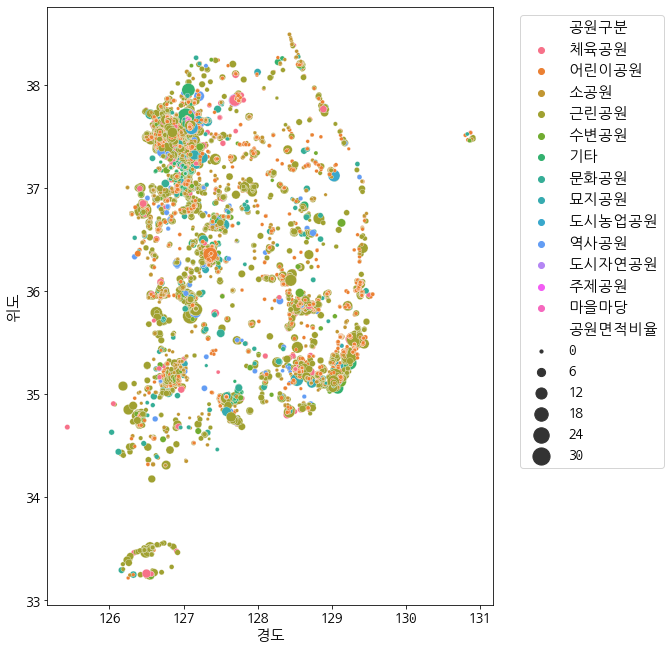

In [42]:
plt.figure(figsize=(8, 11))
sns.scatterplot(data=park_202212_ok, x='경도', y='위도', hue='공원구분', size='공원면적비율', sizes=(10, 300))
plt.legend(loc=1, bbox_to_anchor=(1.4, 1.0)) # 범례 위치
plt.show()

어린이공원을 제외한 공원 분포

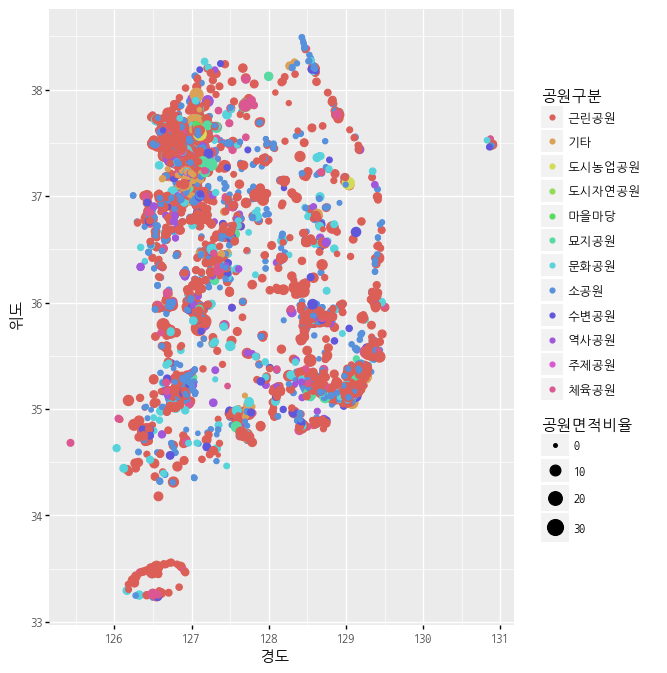

<ggplot: (177844893595)>

In [43]:
(
    ggplot(park_202212_ok[park_202212_ok['공원구분'] != '어린이공원'], aes(x='경도', y='위도', color='공원구분', size='공원면적비율'))
        + geom_point()
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(6, 8))
)

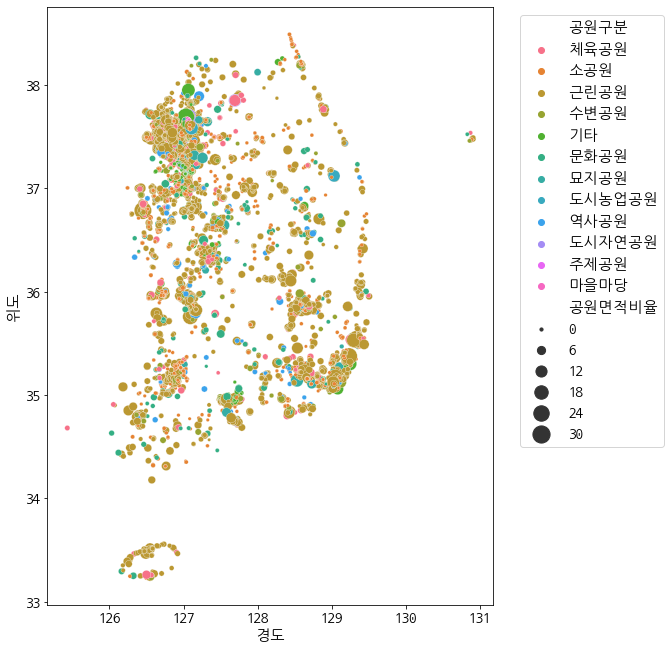

In [44]:
plt.figure(figsize=(8, 11))
sns.scatterplot(data=park_202212_ok[park_202212_ok['공원구분'] != '어린이공원'], x='경도', y='위도', hue='공원구분', 
                size='공원면적비율', sizes=(10, 300))
plt.legend(loc=1, bbox_to_anchor=(1.4, 1.0)) # 범례 위치
plt.show()

시도별 공원 비율

In [45]:
# value_counts() 함수로 시도별 합계 데이터를 계산한다.
# value_counts() 함수의 normalize 옵션의 기본값은 False이고 합계를 계산하고 True로 변경하면 전체 합계에 대한 비율을 계산한다.
# value_counts() 함수의 ascending 옵션의 기본값은 False이고 내림차순으로 정렬하고 True로 변경하면 오름차순으로 정렬한다.
# value_counts() 함수의 dropna 옵션의 기본값은 True이고 NaN을 무시하고 계산하고 False로 변경하면 NaN을 포함시켜 계산한다.
park_do = pd.DataFrame(park_202212_ok['시도'].value_counts()) # normalize=False, ascending=False, dropna=True
park_do.head()

시도
경기도    4426
충청남도   1762
서울특별시  1759
경상남도   1163
전라남도   1038

In [46]:
park_do_normalize = pd.DataFrame(park_202212_ok['시도'].value_counts(normalize=True))
park_do_normalize.head()

시도
경기도    0.254280
충청남도   0.101229
서울특별시  0.101057
경상남도   0.066816
전라남도   0.059635

In [47]:
# 시도별 합계 데이터와 비율 데이터를 병합한다.
# 병합하려는 데이터프레임에 병합 기준을 인덱스로 지정하려면 left_index 옵션과 right_index 옵션을 True로 지정한다.
park_sido = park_do.merge(park_do_normalize, left_index=True, right_index=True).reset_index()
# 병합된 데이터프레임의 열 이름을 변경한다.
park_sido.columns = ['시도', '합계', '비율']
# park_sido.sort_values(by=['합계'], ascending=True, inplace=True) # 합계에 대한 오름차순 정렬을 실행하고 데이터프레임에 바로 적용한다.
# park_sido.sort_values(by=['합계'], inplace=True) # 합계에 대한 내림차순 정렬을 실행하고 데이터프레임에 바로 적용한다.
park_sido

시도    합계        비율
0       경기도  4426  0.254280
1      충청남도  1762  0.101229
2     서울특별시  1759  0.101057
3      경상남도  1163  0.066816
4      전라남도  1038  0.059635
5      경상북도  1019  0.058543
6     광주광역시   932  0.053545
7      충청북도   789  0.045329
8     인천광역시   690  0.039642
9     부산광역시   674  0.038722
10     전라북도   664  0.038148
11      강원도   632  0.036309
12    대구광역시   631  0.036252
13    울산광역시   467  0.026830
14    대전광역시   445  0.025566
15  제주특별자치도   245  0.014076
16  세종특별자치시    70  0.004022

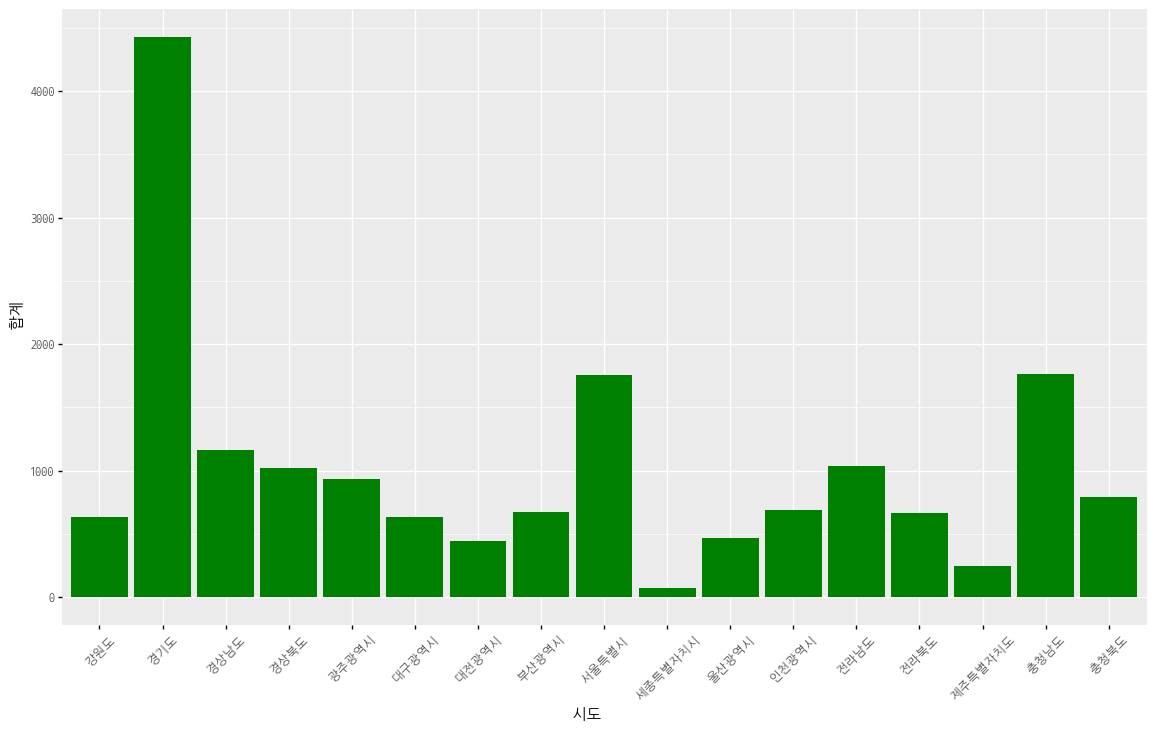

<ggplot: (-9223371859007790553)>

In [48]:
(
    ggplot(park_sido, aes(x='시도', y='합계'))
        + geom_bar(stat='identity', position='dodge', fill='green')
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(14, 8), 
                axis_text_x=element_text(rotation=45))
)

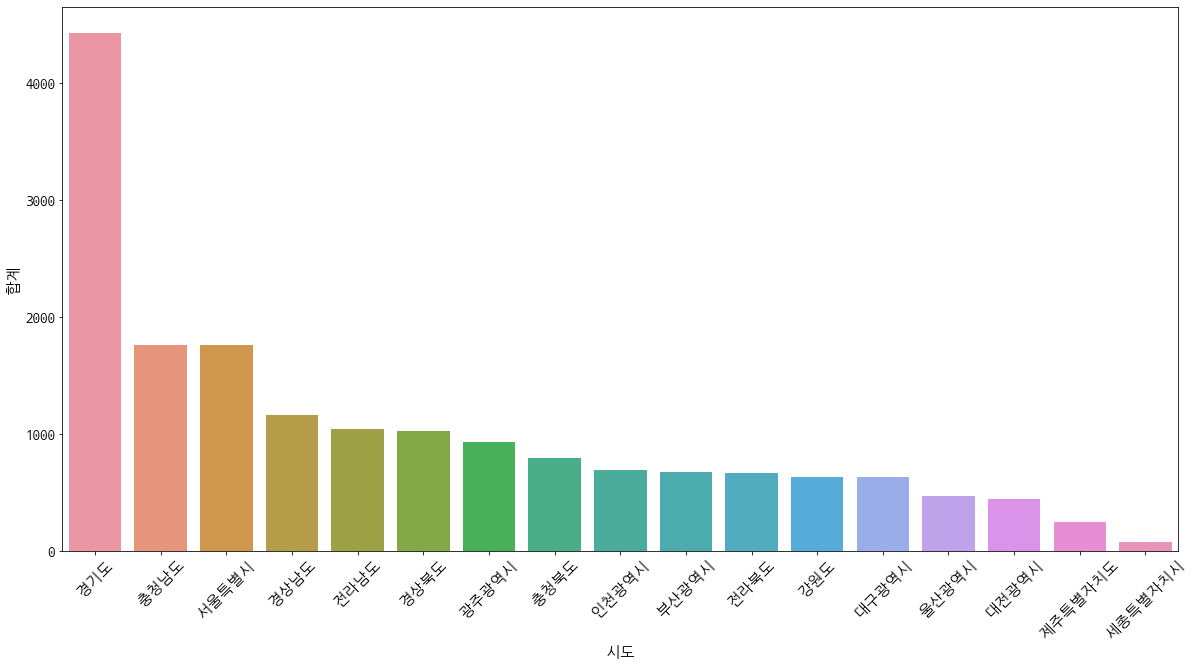

In [49]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(data=park_sido, x='시도', y='합계')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [50]:
# https://plotnine.readthedocs.io/en/stable/tutorials/miscellaneous-order-plot-series.html
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg

%matplotlib inline

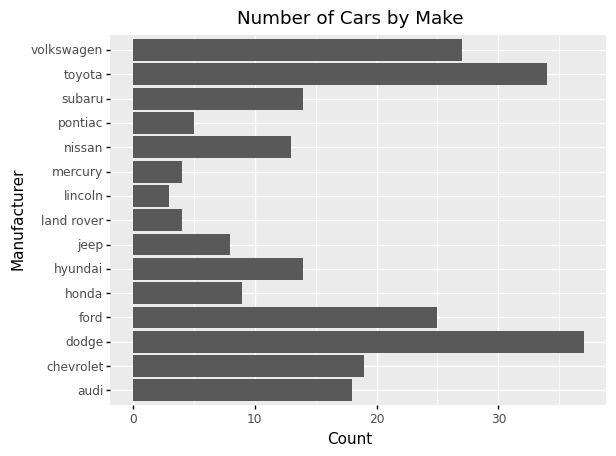

<ggplot: (177847054021)>

In [51]:
(ggplot(mpg)
 + aes(x='manufacturer')
 + geom_bar(size=20)
 + coord_flip()
 + labs(y='Count', x='Manufacturer', title='Number of Cars by Make')
)

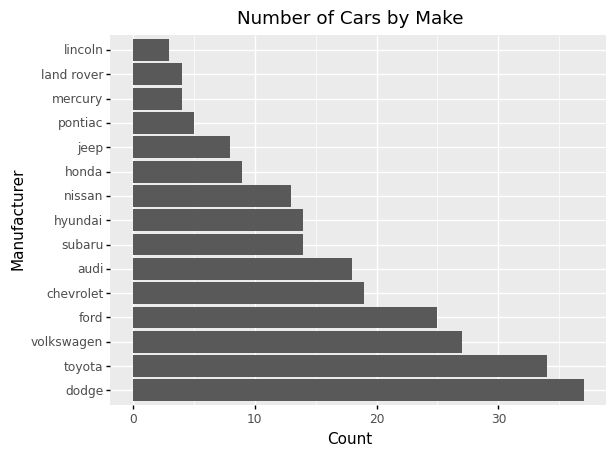

<ggplot: (177847092477)>

In [52]:
# Determine order and create a categorical type
# Note that value_counts() is already sorted
manufacturer_list = mpg['manufacturer'].value_counts().index.tolist()
manufacturer_cat = pd.Categorical(mpg['manufacturer'], categories=manufacturer_list)

# assign to a new column in the DataFrame
mpg = mpg.assign(manufacturer_cat = manufacturer_cat)

(ggplot(mpg)
 + aes(x='manufacturer_cat')
 + geom_bar(size=20)
 + coord_flip()
 + labs(y='Count', x='Manufacturer', title='Number of Cars by Make')
)

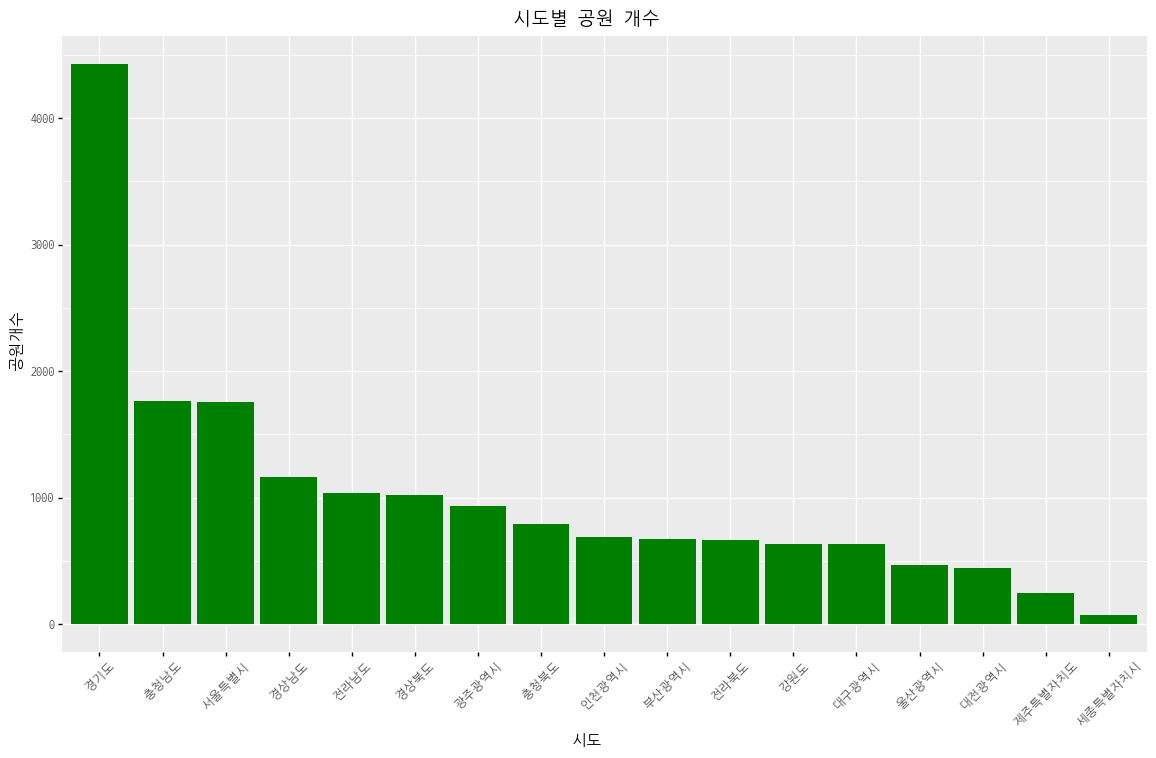

<ggplot: (177847092267)>

In [53]:
park_list = park_202212_ok['시도'].value_counts().index.tolist()
parkList = pd.Categorical(park_202212_ok['시도'], categories=park_list)
park_202212_ok = park_202212_ok.assign(공원목록 = parkList)

(ggplot(park_202212_ok)
    + aes(x='공원목록')
    + geom_bar(size=20, fill='green')
    + labs(y='공원개수', x='시도', title='시도별 공원 개수')
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(14, 8),
           axis_text_x=element_text(rotation=45))
)

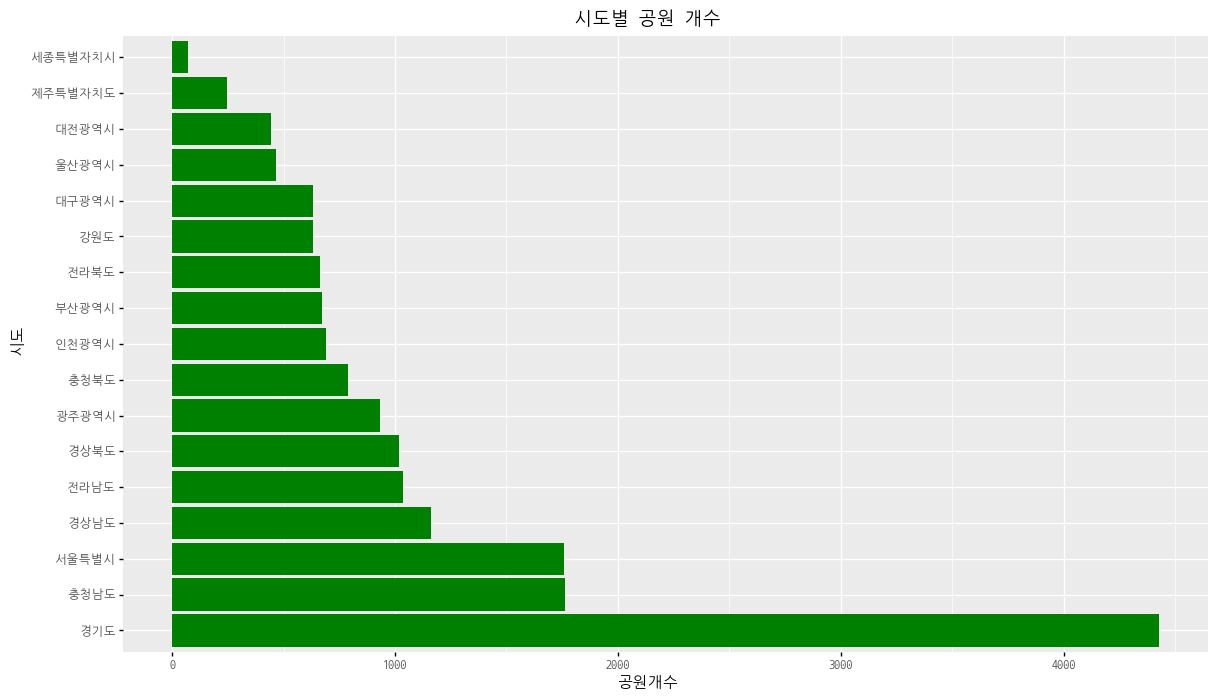

<ggplot: (-9223371859012904332)>

In [54]:
(ggplot(park_202212_ok)
    + aes(x='공원목록')
    + geom_bar(size=20, fill='green')
    + coord_flip() # 차트의 x축 y축을 회전시킨다.
    + labs(y='공원개수', x='시도', title='시도별 공원 개수')
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(14, 8))
)

공원 구분별 합계

In [55]:
park_type = pd.DataFrame(park_202212_ok['공원구분'].value_counts()).reset_index()
park_type.columns = ['공원구분', '합계']
park_type

공원구분    합계
0    어린이공원  9073
1     근린공원  3917
2      소공원  2603
3       기타   577
4     문화공원   374
5     수변공원   326
6     체육공원   250
7     역사공원   185
8     마을마당    49
9     묘지공원    38
10  도시농업공원     7
11  도시자연공원     5
12    주제공원     2

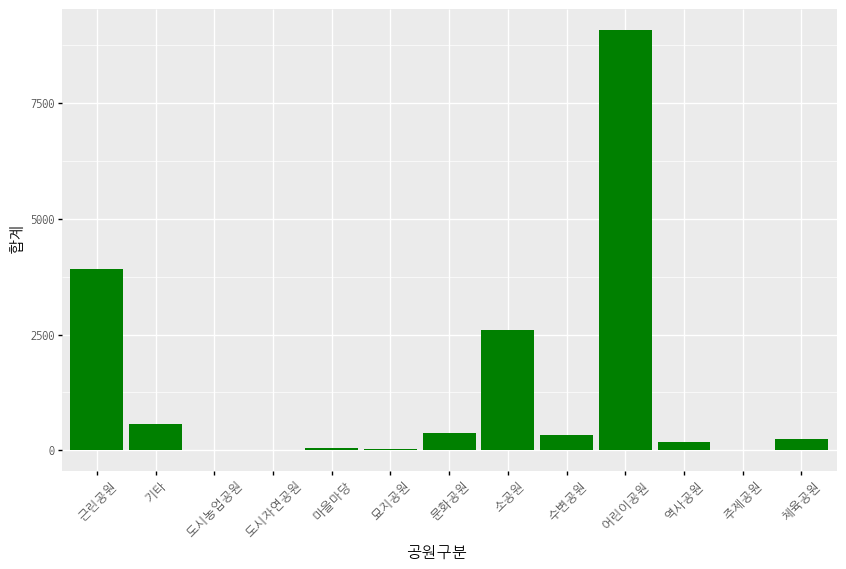

<ggplot: (-9223371859007489080)>

In [56]:
(
    ggplot(park_type, aes(x='공원구분', y='합계'))
        + geom_bar(stat='identity', position='dodge', fill='green')
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6), 
                axis_text_x=element_text(rotation=45))
)

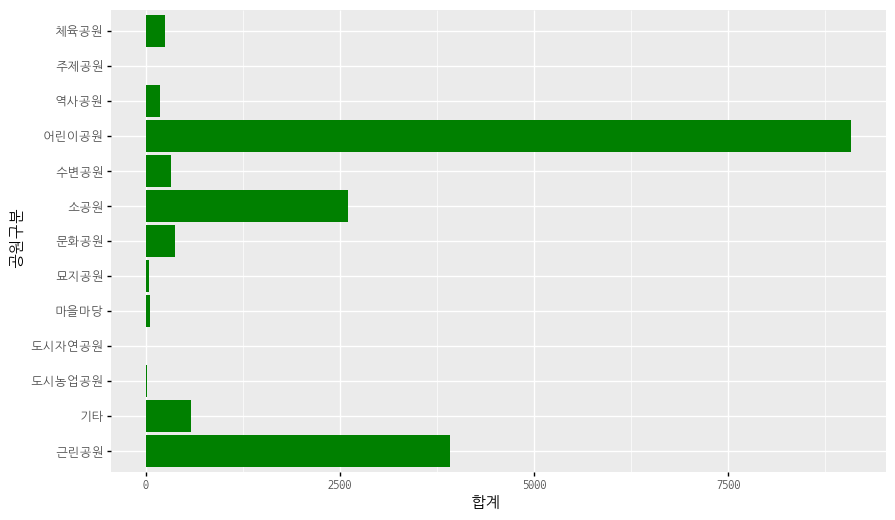

<ggplot: (-9223371859014019619)>

In [57]:
(
    ggplot(park_type, aes(x='공원구분', y='합계'))
        + geom_bar(stat='identity', position='dodge', fill='green')
        + coord_flip()
        + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6))
)

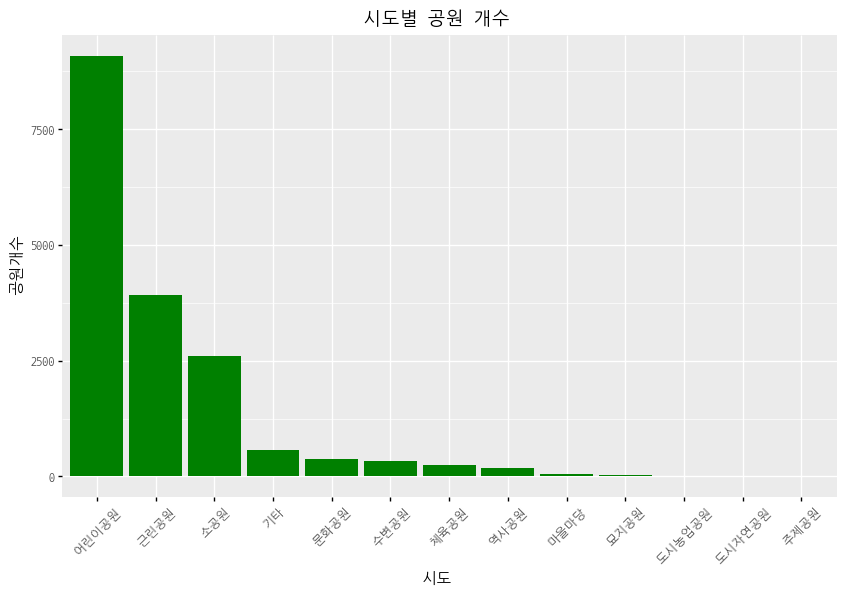

<ggplot: (-9223371859010206734)>

In [58]:
park_list = park_202212_ok['공원구분'].value_counts().index.tolist()
parkList = pd.Categorical(park_202212_ok['공원구분'], categories=park_list)
park_202212_ok = park_202212_ok.assign(공원목록 = parkList)

(ggplot(park_202212_ok)
    + aes(x='공원목록')
    + geom_bar(size=20, fill='green')
    + labs(y='공원개수', x='시도', title='시도별 공원 개수')
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6),
           axis_text_x=element_text(rotation=45))
)

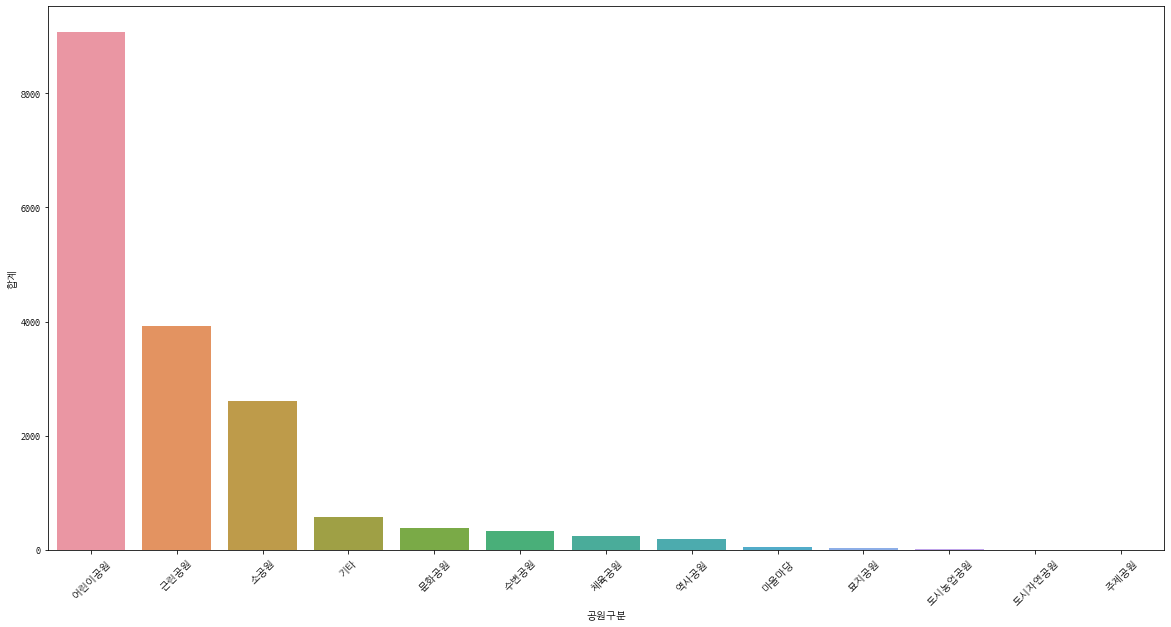

In [59]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(data=park_type, x='공원구분', y='합계')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

경기도 공원 분포

In [60]:
gyeonggi = park_202212_ok[park_202212_ok['시도'] == '경기도']
gyeonggi

관리번호              공원명   공원구분                 소재지도로명주소  \
36     41590-00510              71호     기타      경기도 화성시 오산동 1030-20   
80     41370-00108     세교2 제5호 수변공원   수변공원          경기도 오산시 금암동 198   
81     41370-00109           원동수변공원   수변공원       경기도 오산시 부원로87번길 51   
82     41370-00110          가장동체육공원   체육공원        경기도 오산시 가장산업동로 49   
107    41430-00111             근린공원   근린공원         경기도 의왕시 초평동 19-1   
...            ...              ...    ...                      ...   
17460  41461-00025      삼가지구 어린이공원1  어린이공원    경기도 용인시 처인구 삼가동 288-1   
17461  41461-00026       삼가1지구 체육공원   체육공원   경기도 용인시 처인구 삼가동 268-26   
17462  41461-00027      제107호 어린이공원  어린이공원  경기도 용인시 처인구 모현읍 왕산리 949   
17463  41461-00028      제105호 어린이공원  어린이공원   경기도 용인시 처인구 포곡읍 둔전리450   
17464  41465-00016  제15호 근린공원(수지공원)   근린공원     경기도 용인시 수지구 풍덕천동 696   

                       소재지지번주소         위도          경도     공원면적           전화번호  \
36         경기도 화성시 오산동 1030-20  37.185729  127.102619   6934.0  031-5189-6961   
80             경기도 오산시 금암동 198  37.169502  127.049281   1258.0  031-8036-6473   
81            경기도 오산시 원동 715-8  37.140907  127.091507  17788.0  031-8036-6473   
82           경기도 오산시 가장동 382-4  37.164782  127.041189  11856.0  031-8036-6473   
107           경기도 의왕시 초평동 19-1  37.318538  126.944477  14234.0   031-345-3083   
...                        ...        ...         ...      ...            ...   
17460    경기도 용인시 처인구 삼가동 288-1  37.238001  127.164249   4878.0            NaN   
17461   경기도 용인시 처인구 삼가동 268-26  37.238235  127.169302  17748.0            NaN   
17462  경기도 용인시 처인구 모현읍 왕산리 949  37.333938  127.253862   5817.0            NaN   
17463   경기도 용인시 처인구 포곡읍 둔전리450  37.272922  127.221799   2558.0            NaN   
17464     경기도 용인시 수지구 풍덕천동 696  37.323979  127.091005  15741.0            NaN   

          데이터기준일자   제공기관코드    제공기관명    공원면적비율   시도  주소1      주소2      주소3  \
36     2022-11-01  5530000  경기도 화성시  0.832706  경기도  화성시      오산동  1030-20   
80     2022-04-30  4000000  경기도 오산시  0.354683  경기도  오산시      금암동      198   
81     2022-04-30  4000000  경기도 오산시  1.333717  경기도  오산시  부원로87번길       51   
82     2022-04-30  4000000  경기도 오산시  1.088853  경기도  오산시   가장산업동로       49   
107    2022-06-13  4030000  경기도 의왕시  1.193063  경기도  의왕시      초평동     19-1   
...           ...      ...      ...       ...  ...  ...      ...      ...   
17460  2022-11-23  4050000  경기도 용인시  0.698427  경기도  용인시      처인구      삼가동   
17461  2022-11-23  4050000  경기도 용인시  1.332216  경기도  용인시      처인구      삼가동   
17462  2022-11-23  4050000  경기도 용인시  0.762693  경기도  용인시      처인구      모현읍   
17463  2022-11-23  4050000  경기도 용인시  0.505767  경기도  용인시      처인구      포곡읍   
17464  2022-11-23  4050000  경기도 용인시  1.254631  경기도  용인시      수지구     풍덕천동   

        공원목록  
36        기타  
80      수변공원  
81      수변공원  
82      체육공원  
107     근린공원  
...      ...  
17460  어린이공원  
17461   체육공원  
17462  어린이공원  
17463  어린이공원  
17464   근린공원  

[4426 rows x 18 columns]

In [61]:
gyeonggi_type = pd.DataFrame(gyeonggi['공원구분'].value_counts()).reset_index()
park_type.columns = ['공원구분', '합계']
park_type

공원구분    합계
0    어린이공원  9073
1     근린공원  3917
2      소공원  2603
3       기타   577
4     문화공원   374
5     수변공원   326
6     체육공원   250
7     역사공원   185
8     마을마당    49
9     묘지공원    38
10  도시농업공원     7
11  도시자연공원     5
12    주제공원     2

In [62]:
gyeonggi_map = folium.Map(location=[gyeonggi['위도'].mean(), gyeonggi['경도'].mean()], zoom_start=10)
for i in gyeonggi.index:
    parkName = folium.Popup('{} - {}'.format(gyeonggi.loc[i, '공원명'], gyeonggi.loc[i, '소재지도로명주소']), max_width=300)
    # print(parkName)
    folium.Marker(location=[gyeonggi.loc[i, '위도'], gyeonggi.loc[i, '경도']], popup=parkName).add_to(gyeonggi_map)
gyeonggi_map

수원시 공원 분포

In [63]:
suwon = park_202212_ok[park_202212_ok['주소1'] == '수원시']
suwon

관리번호     공원명  공원구분                   소재지도로명주소  \
529    41113-00121  12호소공원   소공원      경기도 수원시 권선구 평동 13-236   
1061   41111-00059  61호소공원   소공원  경기도 수원시 장안구 정조로 1053번길 36   
1086   41111-00058  60호소공원   소공원      경기도 수원시 장안구 정자동 836-5   
1137   41111-00057  40호소공원   소공원     경기도 수원시 장안구 정자동 569-11   
4668   41111-00055    송원공원   소공원      경기도 수원시 장안구 조원동 912-2   
...            ...     ...   ...                        ...   
6667   41113-00010      솔대  근린공원        경기도 수원시 권선구 고색동 992   
6668   41113-00011   고색중보들  근린공원       경기도 수원시 권선구 고색동 1129   
6669   41113-00012     들바람  근린공원        경기도 수원시 권선구 고색동 931   
6670   41113-00013      고렴  근린공원       경기도 수원시 권선구 곡반정동 546   
15635  41111-00056  39호소공원   소공원        경기도 수원시 장안구 이목동 850   

                      소재지지번주소         위도          경도      공원면적          전화번호  \
529     경기도 수원시 권선구 평동 13-236  37.239795  127.055275    1315.3  031-228-6195   
1061    경기도 수원시 장안구 송죽동 346-6  37.299249  127.003495     971.3  031-228-5995   
1086    경기도 수원시 장안구 정자동 836-5  37.297441  126.998182    3482.0  031-228-5995   
1137   경기도 수원시 장안구 정자동 569-11  37.310750  126.986922    2531.0  031-228-5995   
4668    경기도 수원시 장안구 조원동 912-2  37.307682  127.011315    3071.0  031-228-5995   
...                       ...        ...         ...       ...           ...   
6667      경기도 수원시 권선구 고색동 992  37.236185  126.981703   10354.0  031-228-6195   
6668     경기도 수원시 권선구 고색동 1129  37.248230  126.990030  138326.5  031-228-6195   
6669      경기도 수원시 권선구 고색동 931  37.240728  126.978718    5186.7  031-228-6195   
6670     경기도 수원시 권선구 곡반정동 546  37.240630  127.029210   10571.0  031-228-6195   
15635     경기도 수원시 장안구 이목동 850  37.314276  126.986209    2817.0  031-228-5995   

          데이터기준일자   제공기관코드    제공기관명    공원면적비율   시도  주소1  주소2   주소3  공원목록  
529    2022-06-20  3740000  경기도 수원시  0.362671  경기도  수원시  권선구    평동   소공원  
1061   2022-06-20  3740000  경기도 수원시  0.311657  경기도  수원시  장안구   정조로   소공원  
1086   2022-06-20  3740000  경기도 수원시  0.590085  경기도  수원시  장안구   정자동   소공원  
1137   2022-06-20  3740000  경기도 수원시  0.503090  경기도  수원시  장안구   정자동   소공원  
4668   2022-06-20  3740000  경기도 수원시  0.554166  경기도  수원시  장안구   조원동   소공원  
...           ...      ...      ...       ...  ...  ...  ...   ...   ...  
6667   2022-06-20  3740000  경기도 수원시  1.017546  경기도  수원시  권선구   고색동  근린공원  
6668   2022-06-20  3740000  경기도 수원시  3.719227  경기도  수원시  권선구   고색동  근린공원  
6669   2022-06-20  3740000  경기도 수원시  0.720187  경기도  수원시  권선구   고색동  근린공원  
6670   2022-06-20  3740000  경기도 수원시  1.028154  경기도  수원시  권선구  곡반정동  근린공원  
15635  2022-06-20  3740000  경기도 수원시  0.530754  경기도  수원시  장안구   이목동   소공원  

[335 rows x 18 columns]

In [64]:
suwon_map = folium.Map(location=[suwon['위도'].mean(), suwon['경도'].mean()], zoom_start=13)
for i in suwon.index:
    parkName = folium.Popup('{} - {}'.format(suwon.loc[i, '공원명'], suwon.loc[i, '소재지도로명주소']), max_width=300)
    folium.Marker(location=[suwon.loc[i, '위도'], suwon.loc[i, '경도']], popup=parkName).add_to(suwon_map)
suwon_map

In [65]:
suwon_map = folium.Map(location=[suwon['위도'].mean(), suwon['경도'].mean()], zoom_start=13)
for i in suwon.index:
    parkName = folium.Popup('{} - {}'.format(suwon.loc[i, '공원명'], suwon.loc[i, '소재지도로명주소']), max_width=300)
    folium.CircleMarker(location=[suwon.loc[i, '위도'], suwon.loc[i, '경도']], popup=parkName,
                       radius=suwon.loc[i, '공원면적비율'] * 3, color='red', fill_color='white').add_to(suwon_map)
suwon_map

경기도 일부 공원만 보기

In [66]:
import re

In [67]:
park_type = r'.*([역사|체육|수변|문화|묘지]공원).*'
gyeonggi_sample = gyeonggi[gyeonggi['공원구분'].str.match(park_type)]
gyeonggi_sample

관리번호           공원명  공원구분                    소재지도로명주소  \
80     41370-00108  세교2 제5호 수변공원  수변공원             경기도 오산시 금암동 198   
81     41370-00109        원동수변공원  수변공원          경기도 오산시 부원로87번길 51   
82     41370-00110       가장동체육공원  체육공원           경기도 오산시 가장산업동로 49   
108    41430-00114        갈미한글공원  문화공원           경기도 의왕시 내손동 228-1   
109    41430-00115         문화공원3  문화공원           경기도 의왕시 고천동 100-2   
...            ...           ...   ...                         ...   
17233  41610-00004        중대물빛공원  수변공원           경기도 광주시 중대동 246-2   
17448  41461-00013       천주교묘지공원  묘지공원  경기도 용인시 처인구 모현읍 오산로 154-62   
17450  41461-00015        용인묘지공원  묘지공원   경기도 용인시 처인구 모현읍 초부리 산67-6   
17451  41461-00016        서울묘지공원  묘지공원     경기도 용인시 처인구 이동읍 서리 산4-8   
17461  41461-00026    삼가1지구 체육공원  체육공원      경기도 용인시 처인구 삼가동 268-26   

                         소재지지번주소         위도          경도       공원면적  \
80               경기도 오산시 금암동 198  37.169502  127.049281     1258.0   
81              경기도 오산시 원동 715-8  37.140907  127.091507    17788.0   
82             경기도 오산시 가장동 382-4  37.164782  127.041189    11856.0   
108            경기도 의왕시 내손동 228-1  37.377965  126.984955    12537.0   
109            경기도 의왕시 고천동 100-2  37.340450  126.972404    15982.0   
...                          ...        ...         ...        ...   
17233          경기도 광주시 중대동 246-2  37.400374  127.218900   230932.0   
17448  경기도 용인시 처인구 모현읍 오산리 325-4  37.321104  127.146527   847474.0   
17450  경기도 용인시 처인구 모현읍 초부리 산67-6  37.295427  127.256006  1307080.0   
17451    경기도 용인시 처인구 이동읍 서리 산4-8  37.220169  127.174347   202150.0   
17461     경기도 용인시 처인구 삼가동 268-26  37.238235  127.169302    17748.0   

                전화번호     데이터기준일자   제공기관코드    제공기관명     공원면적비율   시도  주소1  \
80     031-8036-6473  2022-04-30  4000000  경기도 오산시   0.354683  경기도  오산시   
81     031-8036-6473  2022-04-30  4000000  경기도 오산시   1.333717  경기도  오산시   
82     031-8036-6473  2022-04-30  4000000  경기도 오산시   1.088853  경기도  오산시   
108     031-345-3534  2022-06-13  4030000  경기도 의왕시   1.119687  경기도  의왕시   
109     031-345-3083  2022-06-13  4030000  경기도 의왕시   1.264199  경기도  의왕시   
...              ...         ...      ...      ...        ...  ...  ...   
17233   031-762-1039  2022-10-05  5540000  경기도 광주시   4.805538  경기도  광주시   
17448            NaN  2022-11-23  4050000  경기도 용인시   9.205835  경기도  용인시   
17450            NaN  2022-11-23  4050000  경기도 용인시  11.432760  경기도  용인시   
17451            NaN  2022-11-23  4050000  경기도 용인시   4.496109  경기도  용인시   
17461            NaN  2022-11-23  4050000  경기도 용인시   1.332216  경기도  용인시   

           주소2    주소3  공원목록  
80         금암동    198  수변공원  
81     부원로87번길     51  수변공원  
82      가장산업동로     49  체육공원  
108        내손동  228-1  문화공원  
109        고천동  100-2  문화공원  
...        ...    ...   ...  
17233      중대동  246-2  수변공원  
17448      처인구    모현읍  묘지공원  
17450      처인구    모현읍  묘지공원  
17451      처인구    이동읍  묘지공원  
17461      처인구    삼가동  체육공원  

[387 rows x 18 columns]

In [68]:
gyeonggi_sample_map = folium.Map(location=[gyeonggi_sample['위도'].mean(), gyeonggi_sample['경도'].mean()], zoom_start=10)
for i in gyeonggi_sample.index:
    parkName = folium.Popup('{} - {}'.format(gyeonggi_sample.loc[i, '공원명'], gyeonggi_sample.loc[i, '소재지도로명주소']), max_width=300)
    folium.Marker(location=[gyeonggi_sample.loc[i, '위도'], gyeonggi_sample.loc[i, '경도']], popup=parkName).add_to(gyeonggi_sample_map)
gyeonggi_sample_map

In [69]:
gyeonggi_sample_map = folium.Map(location=[gyeonggi_sample['위도'].mean(), gyeonggi_sample['경도'].mean()], zoom_start=10)
for i in gyeonggi_sample.index:
    parkName = folium.Popup('{} - {}'.format(gyeonggi_sample.loc[i, '공원명'], gyeonggi_sample.loc[i, '소재지도로명주소']), max_width=300)
    folium.CircleMarker(location=[gyeonggi_sample.loc[i, '위도'], gyeonggi_sample.loc[i, '경도']], popup=parkName,
                       radius=gyeonggi_sample.loc[i, '공원면적비율'] * 3, color='red', fill_color='white').add_to(gyeonggi_sample_map)
gyeonggi_sample_map

In [70]:
seoul = park_202212_ok[park_202212_ok['시도'] == '서울특별시']
seoul

관리번호  공원명   공원구분               소재지도로명주소                소재지지번주소  \
310    11590-00045   나비    소공원    서울특별시 동작구 상도동 535-3    서울특별시 동작구 상도동 535-3   
311    11590-00046  꽃담길    소공원     서울특별시 동작구 상도동 25-8     서울특별시 동작구 상도동 25-8   
312    11590-00047   흑석    소공원  서울특별시 동작구 흑석동 186-135  서울특별시 동작구 흑석동 186-135   
313    11590-00048   칸나    소공원      서울특별시 동작구 시흥대로596     서울특별시 동작구 신대방동 698   
314    11590-00049  꿈나래  어린이공원     서울특별시 동작구 상도동 36-1     서울특별시 동작구 상도동 36-1   
...            ...  ...    ...                    ...                    ...   
17404  11500-00001   우장   근린공원      서울특별시 강서구 우장산로 72    서울특별시 강서구 화곡동 산60-1   
17405  11500-00002   궁산   근린공원     서울특별시 강서구 가양동 산4-7     서울특별시 강서구 가양동 산4-7   
17406  11500-00003   염창   근린공원    서울특별시 강서구 양천로67길 43    서울특별시 강서구 염창동 산24-1   
17407  11500-00004  꿩고개   근린공원    서울특별시 강서구 방화동 산97-1    서울특별시 강서구 방화동 산97-1   
17408  11500-00005  봉제산   근린공원       서울특별시 강서구 화곡동 산1       서울특별시 강서구 화곡동 산1   

              위도          경도      공원면적          전화번호     데이터기준일자   제공기관코드  \
310    37.503346  126.943593     564.1           NaN  2022-04-25  3190000   
311    37.505644  126.942102     206.0           NaN  2022-04-25  3190000   
312    37.509161  126.957863     442.0           NaN  2022-04-25  3190000   
313    37.485627  126.904308     241.0           NaN  2022-04-25  3190000   
314    37.505268  126.948180    1720.2           NaN  2022-04-25  3190000   
...          ...         ...       ...           ...         ...      ...   
17404  37.552820  126.843808  359435.2  02-2600-4185  2022-03-16  3150000   
17405  37.574254  126.841332  135002.7  02-2600-4185  2022-03-16  3150000   
17406  37.557007  126.869821  112070.0  02-2600-4186  2022-03-16  3150000   
17407  37.577983  126.808105  180000.0  02-2600-4186  2022-03-16  3150000   
17408  37.539906  126.849751  917190.0  02-2600-4184  2022-03-16  3150000   

           제공기관명    공원면적비율     시도  주소1      주소2      주소3   공원목록  
310    서울특별시 동작구  0.237508  서울특별시  동작구      상도동    535-3    소공원  
311    서울특별시 동작구  0.143527  서울특별시  동작구      상도동     25-8    소공원  
312    서울특별시 동작구  0.210238  서울특별시  동작구      흑석동  186-135    소공원  
313    서울특별시 동작구  0.155242  서울특별시  동작구  시흥대로596     None    소공원  
314    서울특별시 동작구  0.414753  서울특별시  동작구      상도동     36-1  어린이공원  
...          ...       ...    ...  ...      ...      ...    ...  
17404  서울특별시 강서구  5.995291  서울특별시  강서구     우장산로       72   근린공원  
17405  서울특별시 강서구  3.674271  서울특별시  강서구      가양동     산4-7   근린공원  
17406  서울특별시 강서구  3.347686  서울특별시  강서구   양천로67길       43   근린공원  
17407  서울특별시 강서구  4.242641  서울특별시  강서구      방화동    산97-1   근린공원  
17408  서울특별시 강서구  9.577004  서울특별시  강서구      화곡동       산1   근린공원  

[1759 rows x 18 columns]

In [71]:
set(seoul['주소1'])

{'강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '구로구개봉동',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '면목동',
 '서대문구',
 '성동구',
 '성북구',
 '성북동',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '은평구진관동',
 '정릉동',
 '종로구',
 '중구',
 '중랑구'}